In [3]:
import numpy as np
import pygimli as pg
#import pybert as pb
from pygimli.physics import ert
#from pybert.importer.exportData import exportRes2dInv
from pygimli.physics.ert.importData import importRes2dInv
import matplotlib.pyplot as plt
import pygimli.meshtools as mt
from pygimli.frameworks import PriorModelling, JointModelling
from scipy.interpolate import interp1d
import pandas as pd
import pickle
from pygimli.viewer.mpl import draw1DColumn


In [4]:
dir='//smb.isipd.dmawi.de/projects/p_subaqua/Expeditions/2023/NWT2023/analysis_Tuk/Tuk_all_mehriban/'

In [20]:
east = pd.read_csv(dir + 'new_geom_factors/old/amphibious_ERT_eastern_transect.dat', sep='\s+', skiprows=9, header=None)
header = pd.read_table(dir + 'new_geom_factors/old/amphibious_ERT_eastern_transect.dat', nrows=9, header=None)
east

,0,1,2,3,4,5,6,7,8,9
0,4,0.0,-2.524,15.0,-2.589,5.0,-2.568,10.0,-2.645,2.02
1,4,5.0,-2.568,20.0,-2.560,10.0,-2.645,15.0,-2.589,2.04
2,4,10.0,-2.645,25.0,-2.544,15.0,-2.589,20.0,-2.560,2.12
3,4,15.0,-2.589,30.0,-2.363,20.0,-2.560,25.0,-2.544,2.18
4,4,20.0,-2.560,35.0,-2.248,25.0,-2.544,30.0,-2.363,2.20
...,...,...,...,...,...,...,...,...,...,...
1197,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1198,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1199,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1200,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [21]:
rC1P1 = np.abs(east.iloc[:, 5] - east.iloc[:, 1])
rC2P1 = np.abs(east.iloc[:, 5] - east.iloc[:, 3])
rC1P2 = np.abs(east.iloc[:, 7] - east.iloc[:, 1])
rC2P2 = np.abs(east.iloc[:, 7] - east.iloc[:, 3])
K = 2 * np.pi * 1/((1/rC1P1) - (1/rC2P1) - (1/rC1P2) + (1/rC2P2))
K

0       31.415927
1       31.415927
2       31.415927
3       31.415927
4       31.415927
          ...    
1197          NaN
1198          NaN
1199          NaN
1200          NaN
1201          NaN
Length: 1202, dtype: float64

In [22]:
east.iloc[:, 9] = (east.iloc[:, 9])/K
east

,0,1,2,3,4,5,6,7,8,9
0,4,0.0,-2.524,15.0,-2.589,5.0,-2.568,10.0,-2.645,0.064299
1,4,5.0,-2.568,20.0,-2.560,10.0,-2.645,15.0,-2.589,0.064935
2,4,10.0,-2.645,25.0,-2.544,15.0,-2.589,20.0,-2.560,0.067482
3,4,15.0,-2.589,30.0,-2.363,20.0,-2.560,25.0,-2.544,0.069392
4,4,20.0,-2.560,35.0,-2.248,25.0,-2.544,30.0,-2.363,0.070028
...,...,...,...,...,...,...,...,...,...,...
1197,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1198,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1199,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1200,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [23]:
header_str = header.to_csv(index=False, header=False, sep='\t')

# Save the result to a new file
output_file = dir + 'new_geom_factors/resistance/east_from_my_file.dat'

# Open the file and write the header first, followed by the data
with open(output_file, 'w') as f:
    # Write the header string first
    f.write(header_str)
    
    # Then append the data (without the header)
    east.to_csv(f, sep='\t', index=False, header=False)

In [25]:
data = ert.load(dir + 'new_geom_factors/resistance/east_from_my_file.dat')
data.save(dir+"new_geom_factors/resistance/east_from_my_file.txt", "a b m n err r")

22/10/24 - 10:02:55 - pyGIMLi - INFO - could not read unified data format for ERT ... try res2dinv


1

In [5]:
data = ert.load(dir+"new_geom_factors/resistance/east_amph.txt")

20/12/24 - 11:03:30 - pyGIMLi - INFO - Cache c:\Users\mealiy001\AppData\Local\anaconda3\envs\pgcore\Lib\site-packages\pygimli\physics\ert\ert.py:createGeometricFactors restored (12.5s x 5): C:\Users\mealiy001\AppData\Roaming\pygimli\Cache\5845119232481526689


(<Axes: >, <matplotlib.colorbar.Colorbar at 0x230eaab43d0>)

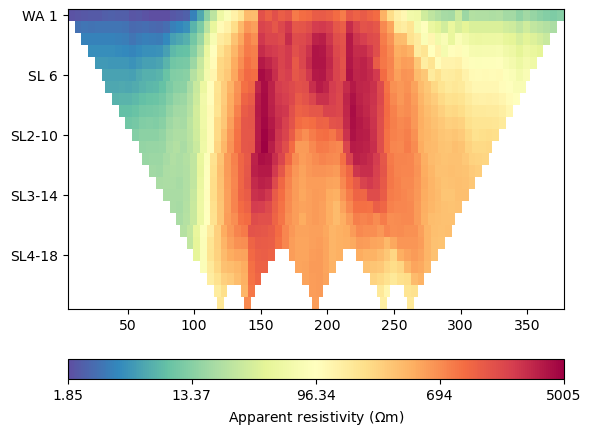

In [6]:
#data.setSensorPositions(pg.meshtools.interpolateAlongCurve(data.additionalPoints(), pg.x(data)))
data['k'] = ert.createGeometricFactors(data, numerical=True)
data['rhoa'] = data['r'] * data['k']
mgr = ert.ERTManager(data)
ert.showData(data)

(<Axes: >, <matplotlib.colorbar.Colorbar at 0x230ea622190>)

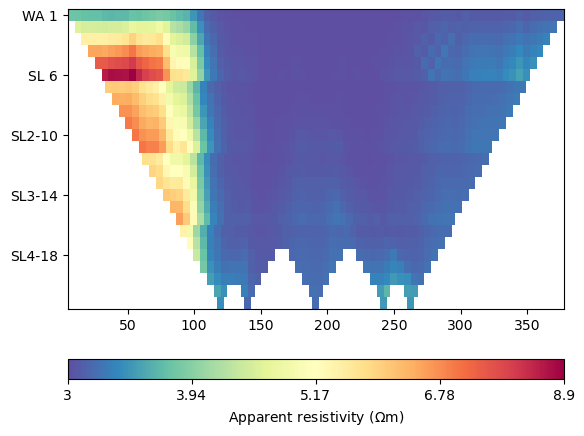

In [7]:

data['err'] = ert.estimateError(data, relativeError=0.03, absoluteUError=5e-5)
ert.show(data, data['err']*100)

22/10/24 - 11:04:13 - pyGIMLi - INFO - Found 2 regions.
22/10/24 - 11:04:13 - pyGIMLi - INFO - (ERTModelling) Region with smallest marker (1) set to background.
22/10/24 - 11:04:13 - pyGIMLi - INFO - Found 2 regions.
22/10/24 - 11:04:13 - pyGIMLi - INFO - (ERTModelling) Region with smallest marker (1) set to background.
22/10/24 - 11:04:13 - pyGIMLi - INFO - Creating forward mesh from region infos.
22/10/24 - 11:04:13 - pyGIMLi - INFO - Creating refined mesh (H2) to solve forward task.
22/10/24 - 11:04:13 - pyGIMLi - INFO - Mesh for forward task: Mesh: Nodes: 3919 Cells: 7304 Boundaries: 5744
22/10/24 - 11:04:14 - pyGIMLi - INFO - Use median(data values)=422.2849678868049
22/10/24 - 11:04:14 - pyGIMLi - INFO - Created startmodel from forward operator: 1548, min/max=422.284968/422.284968
22/10/24 - 11:04:14 - pyGIMLi - INFO - Starting inversion.


fop: <pygimli.physics.ert.ertModelling.ERTModelling object at 0x00000240A78BB7E0>
Data transformation: <pgcore._pygimli_.RTransLogLU object at 0x00000240F1D0AC50>
Model transformation: <pgcore._pygimli_.RTransLog object at 0x00000240F5F53010>
min/max (data): 1.85/5005
min/max (error): 3%/8.9%
min/max (start model): 422/422
--------------------------------------------------------------------------------
inv.iter 0 ... chi² = 2563.33
--------------------------------------------------------------------------------
inv.iter 1 ... chi² =  394.88 (dPhi = 84.38%) lam: 20.0
--------------------------------------------------------------------------------
inv.iter 2 ... chi² =  109.13 (dPhi = 71.66%) lam: 20.0
--------------------------------------------------------------------------------
inv.iter 3 ... chi² =   30.39 (dPhi = 68.53%) lam: 20.0
--------------------------------------------------------------------------------
inv.iter 4 ... chi² =   17.38 (dPhi = 38.72%) lam: 20.0
----------------

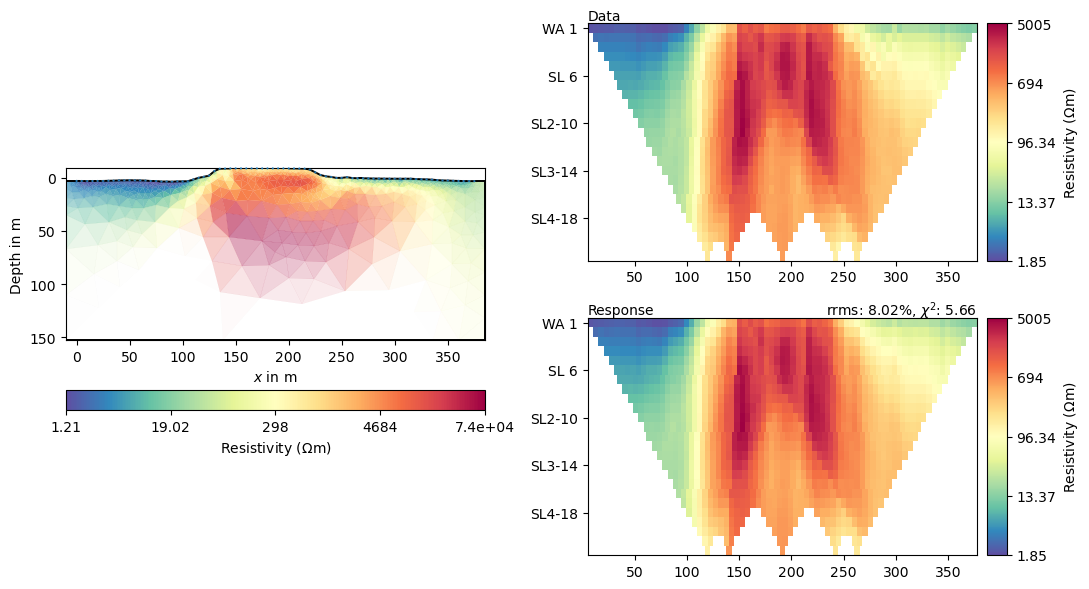

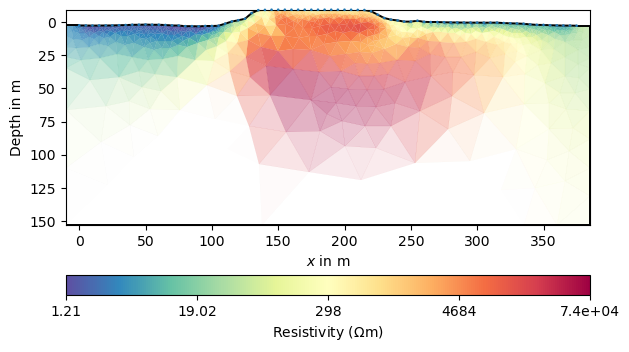

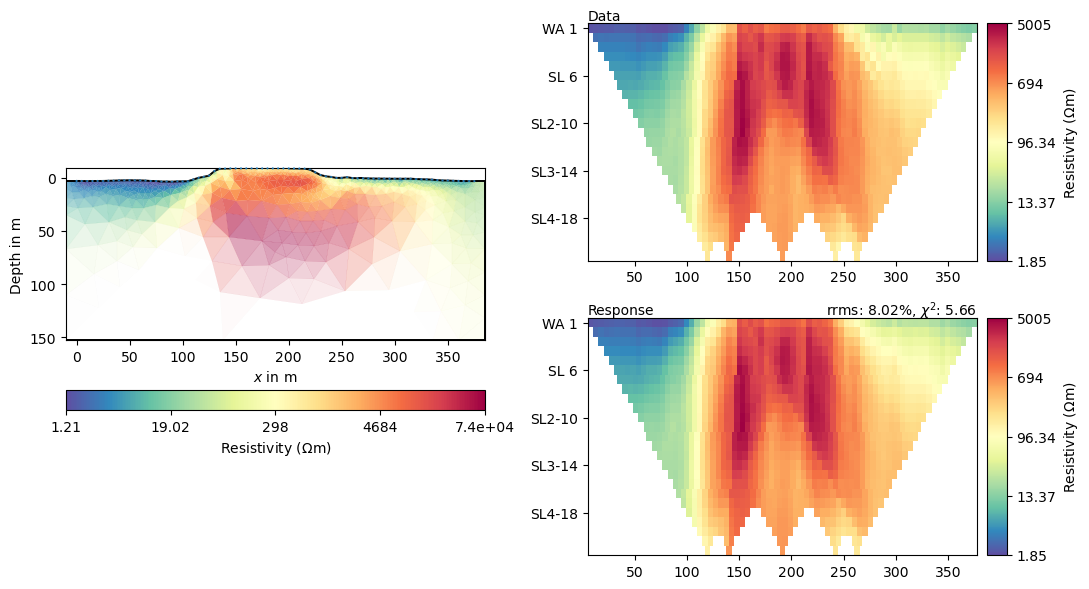

In [41]:

mgr.invert(data, verbose=True, paraDX = 0.25, paraDZ= 0.25, lam=20)

mgr.showResult()
mgr.showResultAndFit()

0 -10.000387192504098 -2.524 0.0
1 -10.000387192504098 -152.745 0.0
2 385.0003871925041 -152.745 0.0
3 385.0003871925041 -2.745 0.0
4 -1510.0003871925041 -2.524 0.0
5 -1510.0003871925041 -1652.524 0.0
6 1885.0003871925041 -2.745 0.0
7 1885.0003871925041 -1652.745 0.0
8 0.0 -2.524 0.0
9 1.25 -2.535 0.0
10 3.75 -2.557 0.0
11 5.0 -2.568 0.0
12 6.25 -2.58725 0.0
13 8.75 -2.62575 0.0
14 10.0 -2.645 0.0
15 11.25 -2.6310000000000002 0.0
16 13.75 -2.6029999999999998 0.0
17 15.0 -2.589 0.0
18 16.25 -2.58175 0.0
19 18.75 -2.56725 0.0
20 20.0 -2.56 0.0
21 21.25 -2.556 0.0
22 23.75 -2.548 0.0
23 25.0 -2.544 0.0
24 26.25 -2.4987500000000002 0.0
25 28.75 -2.40825 0.0
26 30.0 -2.363 0.0
27 31.25 -2.33425 0.0
28 33.75 -2.27675 0.0
29 35.0 -2.2479999999999998 0.0
30 36.25 -2.195 0.0
31 38.75 -2.089 0.0
32 40.0 -2.036 0.0
33 41.25 -2.029 0.0
34 43.75 -2.015 0.0
35 45.0 -2.008 0.0
36 46.25 -1.97375 0.0
37 48.75 -1.90525 0.0
38 50.0 -1.871 0.0
39 51.25 -1.90425 0.0
40 53.75 -1.97075 0.0
41 55.0 -2.004 0.0

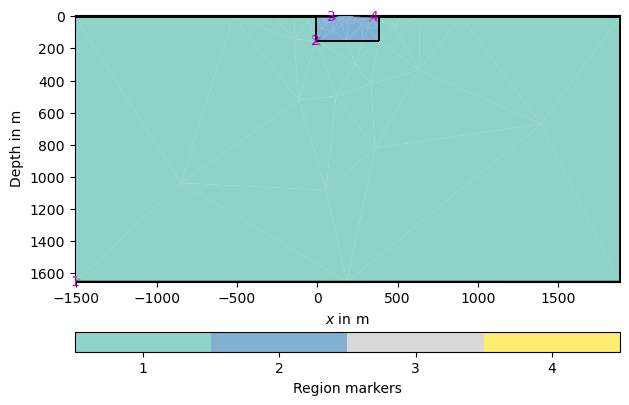

In [8]:
plc = mt.createParaMeshPLC(data,paraDX = 0.25, paraDZ= 0.25)
for i, n in enumerate(plc.nodes()[:]):
    #ax.text(n.x(), n.y(), str(i))
    print(i, n.x(), n.y(), n.z())
for nr, marker in enumerate(plc.regionMarkers()):
    print('Position marker number {}:'.format(nr + 1), marker.x(), marker.y(),
          marker.z())


plc.createNode(-10.000387192504098, 0, 0, marker=234)
#plc.createNode(113.5, 0, 0, marker=235)

plc.createNode(385.0003871925041 , 0, 0, marker=235)

plc.createEdge(plc.node(234), plc.node(76), marker=-1)
plc.createEdge(plc.node(234), plc.node(0), marker=-1)
plc.createEdge(plc.node(167), plc.node(235), marker=-1)
plc.createEdge(plc.node(235), plc.node(3), marker=-1)

plc.addRegionMarker([90, -1], marker=3)  
plc.addRegionMarker([350, -1.5], marker=4)  

ax, _ = pg.show(plc)


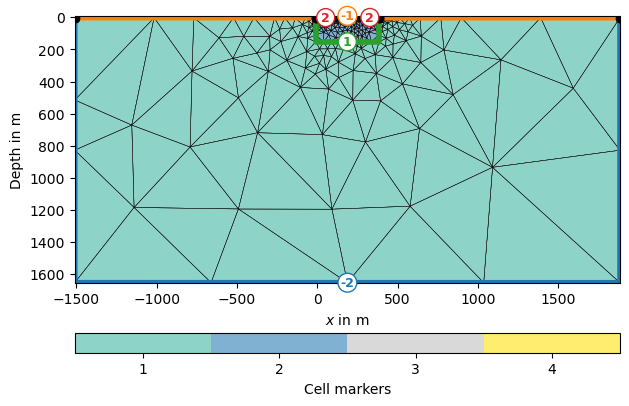

In [9]:
mesh = mt.createMesh(plc)
for b in mesh.boundaries():
    if b.marker() == -1 and not b.outside():
        b.setMarker(2)

#print(mesh)
ax, _ = pg.show(mesh, markers=True, showMesh=True)
#ax.set_ylim(-40)
#ax.set_xlim(-20,390)

22/10/24 - 11:06:11 - pyGIMLi - INFO - Found 4 regions.
22/10/24 - 11:06:11 - pyGIMLi - INFO - (ERTModelling) Region with smallest marker (1) set to background.
22/10/24 - 11:06:11 - pyGIMLi - INFO - Creating forward mesh from region infos.
22/10/24 - 11:06:11 - pyGIMLi - INFO - Creating refined mesh (H2) to solve forward task.
22/10/24 - 11:06:12 - pyGIMLi - INFO - Mesh for forward task: Mesh: Nodes: 7028 Cells: 13292 Boundaries: 10350
22/10/24 - 11:06:12 - pyGIMLi - INFO - Use median(data values)=422.2849678868049
22/10/24 - 11:06:12 - pyGIMLi - INFO - Created startmodel from forward operator: 3060, min/max=422.284968/422.284968
22/10/24 - 11:06:12 - pyGIMLi - INFO - Starting inversion.


fop: <pygimli.physics.ert.ertModelling.ERTModelling object at 0x00000240A78BB7E0>
Data transformation: <pgcore._pygimli_.RTransLogLU object at 0x00000240F1D0AC50>
Model transformation (cumulative):
	 0 <pgcore._pygimli_.RTransLogLU object at 0x00000240F47A10E0>
	 1 <pgcore._pygimli_.RTransLogLU object at 0x00000240F47A1BD0>
	 2 <pgcore._pygimli_.RTransLogLU object at 0x00000240F47A1CB0>
min/max (data): 1.85/5005
min/max (error): 3%/8.9%
min/max (start model): 422/422
--------------------------------------------------------------------------------
inv.iter 0 ... chi² = 2488.58
--------------------------------------------------------------------------------
inv.iter 1 ... chi² =  460.27 (dPhi = 81.30%) lam: 20.0
--------------------------------------------------------------------------------
inv.iter 2 ... chi² =  135.17 (dPhi = 70.05%) lam: 20.0
--------------------------------------------------------------------------------
inv.iter 3 ... chi² =   35.55 (dPhi = 70.85%) lam: 20.0
------

(<Axes: xlabel='$x$ in m', ylabel='Depth in m'>,
 <matplotlib.colorbar.Colorbar at 0x241197896d0>)

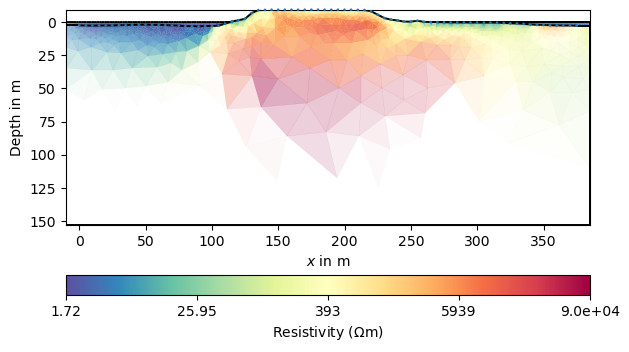

In [44]:
#mesh = mt.createMesh(plc2)
mgr.setMesh(mesh)

#mgr.inv.setRegularization(0, background=False)

#mgr.inv.setRegularization(3)
#mgr.inv.setRegularization(4)

mgr.inv.setRegularization(3, limits=[1, 2])
mgr.inv.setRegularization(4, limits=[3, 4])

#print("Number of regions: ", mgr.fop.regionManager().region(0))
mod2 = mgr.invert(data, lam=20, verbose=True, paraDX = 0.25, paraDZ= 0.25)

mgr.showResult(mod2)

22/10/24 - 11:13:01 - pyGIMLi - INFO - Found 4 regions.
22/10/24 - 11:13:01 - pyGIMLi - INFO - (ERTModelling) Region with smallest marker (1) set to background.
22/10/24 - 11:13:02 - pyGIMLi - INFO - Creating forward mesh from region infos.
22/10/24 - 11:13:02 - pyGIMLi - INFO - Creating refined mesh (H2) to solve forward task.
22/10/24 - 11:13:02 - pyGIMLi - INFO - Mesh for forward task: Mesh: Nodes: 7028 Cells: 13292 Boundaries: 10350
22/10/24 - 11:13:02 - pyGIMLi - INFO - Use median(data values)=422.2849678868049
22/10/24 - 11:13:02 - pyGIMLi - INFO - Created startmodel from forward operator: 2409, min/max=422.284968/422.284968
22/10/24 - 11:13:02 - pyGIMLi - INFO - Starting inversion.


fop: <pygimli.physics.ert.ertModelling.ERTModelling object at 0x00000240A78BB7E0>
Data transformation: <pgcore._pygimli_.RTransLogLU object at 0x00000240F1D0AC50>
Model transformation (cumulative):
	 0 <pgcore._pygimli_.RTransLogLU object at 0x00000240F6D45E70>
min/max (data): 1.85/5005
min/max (error): 3%/8.9%
min/max (start model): 422/422
--------------------------------------------------------------------------------
inv.iter 0 ... chi² = 1477.69
--------------------------------------------------------------------------------
inv.iter 1 ... chi² =  351.49 (dPhi = 75.31%) lam: 20.0
--------------------------------------------------------------------------------
inv.iter 2 ... chi² =  351.49 (dPhi = 0.00%) lam: 20.0
--------------------------------------------------------------------------------
inv.iter 3 ... chi² =  351.48 (dPhi = 0.00%) lam: 20.0
################################################################################
#                 Abort criterion reached: dPhi = 0.0 (

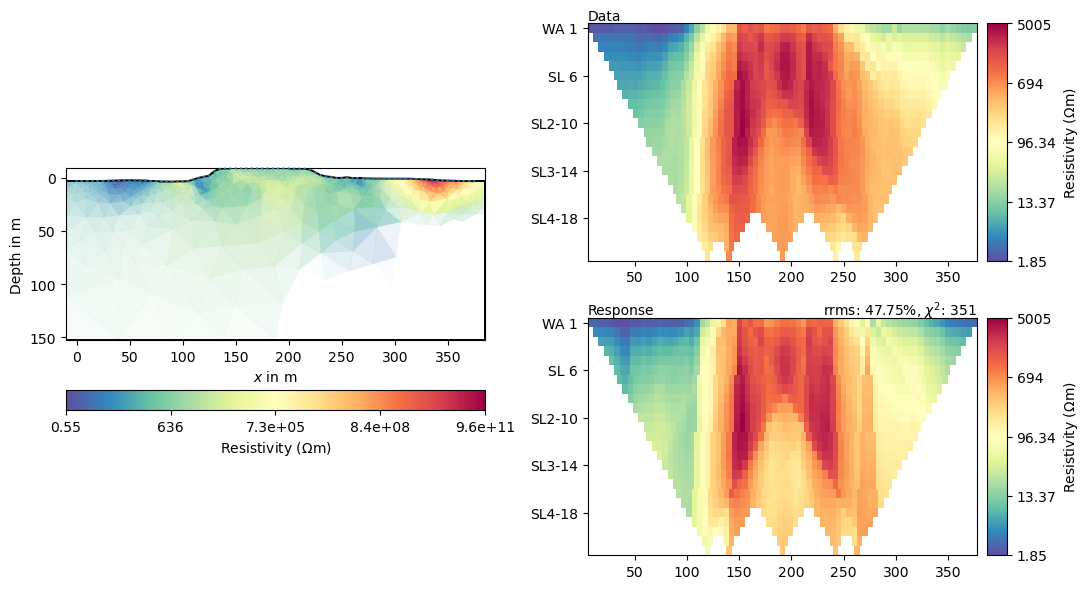

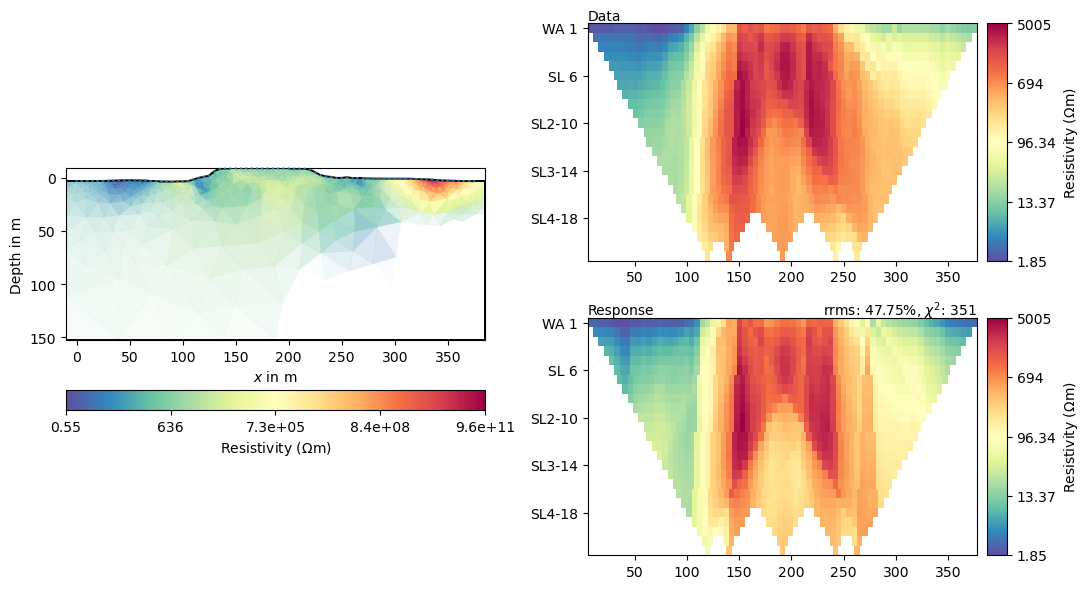

In [46]:
#mesh = mt.createMesh(plc2)
mgr.setMesh(mesh)

#mgr.inv.setRegularization(0, background=False)

mgr.inv.setRegularization(3, fix=1)
mgr.inv.setRegularization(4, fix=1)

#mgr.inv.setRegularization(3, limits=[1, 2])
#mgr.inv.setRegularization(4, limits=[3, 4])

#print("Number of regions: ", mgr.fop.regionManager().region(0))
mod2 = mgr.invert(data, lam=20, verbose=True, paraDX = 0.25, paraDZ= 0.25)

mgr.showResultAndFit()

05/11/24 - 13:48:31 - pyGIMLi - INFO - Found 4 regions.
05/11/24 - 13:48:31 - pyGIMLi - INFO - (ERTModelling) Region with smallest marker (1) set to background.
05/11/24 - 13:48:31 - pyGIMLi - INFO - Creating forward mesh from region infos.
05/11/24 - 13:48:31 - pyGIMLi - INFO - Creating refined mesh (H2) to solve forward task.
05/11/24 - 13:48:31 - pyGIMLi - INFO - Mesh for forward task: Mesh: Nodes: 7028 Cells: 13292 Boundaries: 10350
05/11/24 - 13:48:31 - pyGIMLi - INFO - Use median(data values)=422.28496788679416
05/11/24 - 13:48:31 - pyGIMLi - INFO - Created startmodel from forward operator: 2411, min/max=422.284968/422.284968
05/11/24 - 13:48:31 - pyGIMLi - INFO - Starting inversion.


fop: <pygimli.physics.ert.ertModelling.ERTModelling object at 0x000001C089E0B510>
Data transformation: <pgcore._pygimli_.RTransLogLU object at 0x000001C088DF9120>
Model transformation (cumulative):
	 0 <pgcore._pygimli_.RTransLogLU object at 0x000001C08A58DD20>
	 1 <pgcore._pygimli_.RTransLogLU object at 0x000001C08A58D700>
	 2 <pgcore._pygimli_.RTransLogLU object at 0x000001C08A58C660>
min/max (data): 1.85/5005
min/max (error): 3%/8.9%
min/max (start model): 422/422
--------------------------------------------------------------------------------
inv.iter 0 ... chi² = 2488.58
--------------------------------------------------------------------------------
inv.iter 1 ... chi² =  446.71 (dPhi = 81.93%) lam: 20.0
--------------------------------------------------------------------------------
inv.iter 2 ... chi² =  135.86 (dPhi = 68.78%) lam: 20.0
--------------------------------------------------------------------------------
inv.iter 3 ... chi² =   42.59 (dPhi = 66.10%) lam: 20.0
------

(<Axes: xlabel='$x$ in m', ylabel='Depth in m'>,
 <matplotlib.colorbar.Colorbar at 0x1c08e681950>)

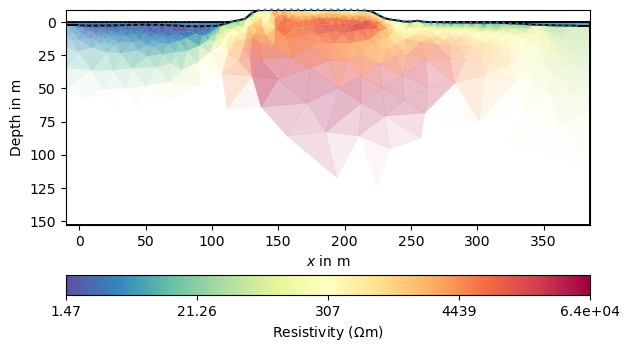

In [19]:
#mesh = mt.createMesh(plc2)
mgr.setMesh(mesh)

#mgr.inv.setRegularization(0, background=False)

mgr.inv.setRegularization(limits=[0, 0], trans="log")
mgr.inv.setRegularization(3, single=True)
mgr.inv.setRegularization(4, single=True)

#mgr.inv.setRegularization(3, limits=[1, 2])
#mgr.inv.setRegularization(4, limits=[3, 4])

#print("Number of regions: ", mgr.fop.regionManager().region(0))
mod2 = mgr.invert(data, lam=20, verbose=True, paraDX = 0.25, paraDZ= 0.25)

mgr.showResult(mod2)

20/12/24 - 11:33:07 - pyGIMLi - INFO - Saving inversion results to: //smb.isipd.dmawi.de/projects/p_subaqua/Expeditions/2023/NWT2023/analysis_Tuk/Tuk_all_mehriban/pygimli/all_inversions/INV_eastern_new_rhoa\ERTManager


Path //smb.isipd.dmawi.de/projects/p_subaqua/Expeditions/2023/NWT2023/analysis_Tuk/Tuk_all_mehriban/pygimli/all_inversions/INV_eastern_new_rhoa\ERTManager already exists. Skipping


('//smb.isipd.dmawi.de/projects/p_subaqua/Expeditions/2023/NWT2023/analysis_Tuk/Tuk_all_mehriban/pygimli/all_inversions/INV_eastern_new_rhoa\\ERTManager',
 <Figure size 1600x1000 with 2 Axes>,
 <Axes: xlabel='$x$ in m', ylabel='Depth in m'>)

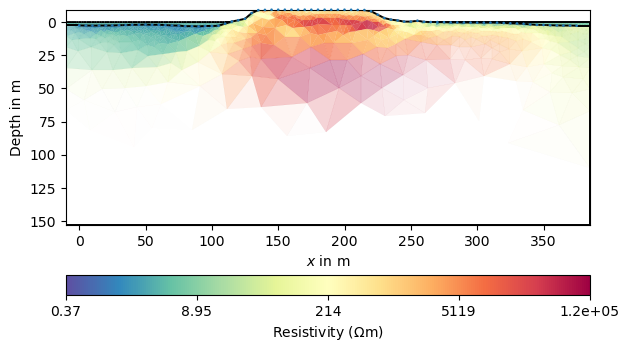

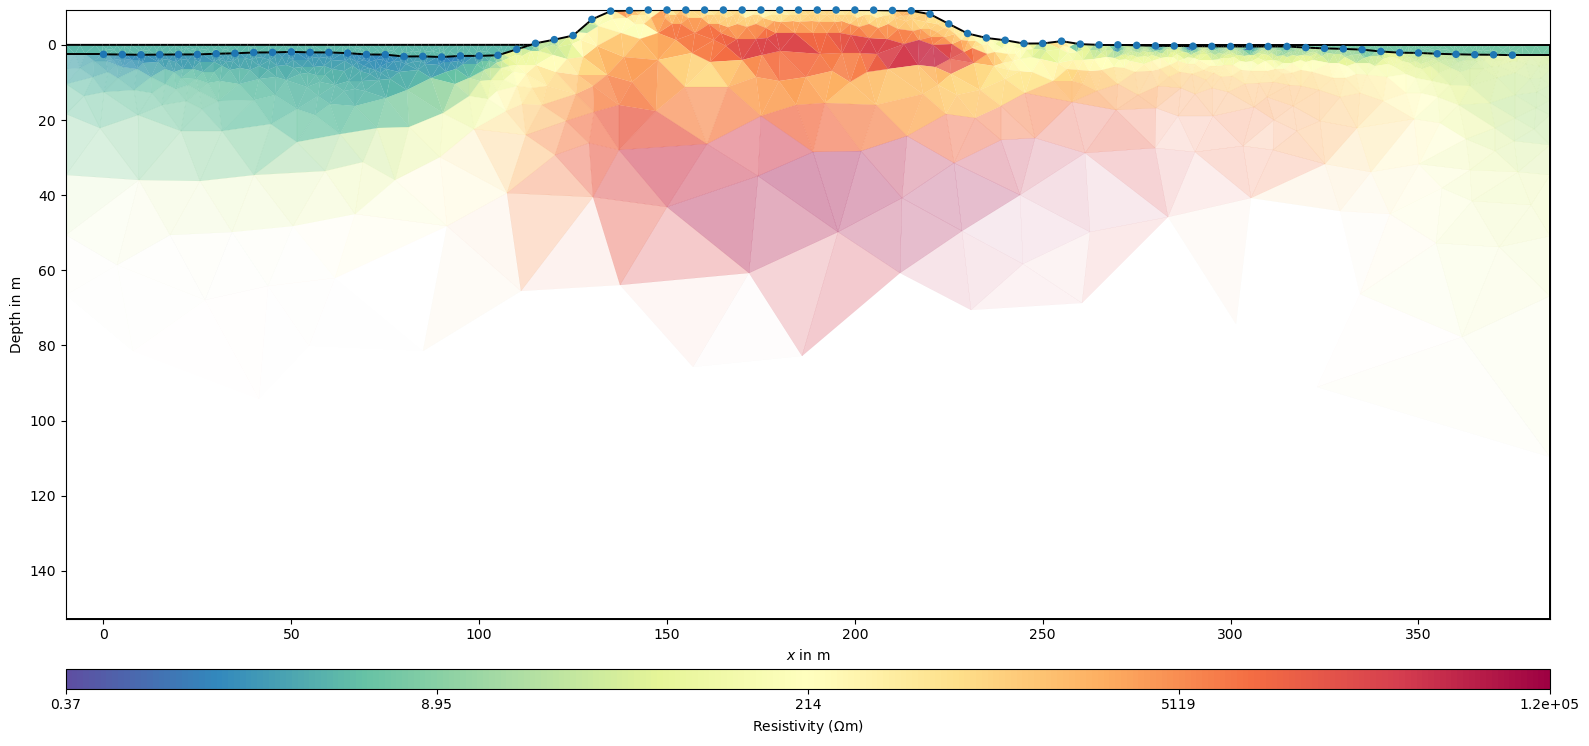

In [13]:
mgr.showResult()
mgr.saveResult(dir+ 'pygimli/all_inversions/INV_eastern_new_rhoa')

20/12/24 - 11:24:49 - pyGIMLi - INFO - Found 4 regions.
20/12/24 - 11:24:49 - pyGIMLi - INFO - (ERTModelling) Region with smallest marker (1) set to background.
20/12/24 - 11:24:49 - pyGIMLi - INFO - Creating forward mesh from region infos.
20/12/24 - 11:24:49 - pyGIMLi - INFO - Creating refined mesh (H2) to solve forward task.
20/12/24 - 11:24:49 - pyGIMLi - INFO - Mesh for forward task: Mesh: Nodes: 7028 Cells: 13292 Boundaries: 10350
20/12/24 - 11:24:50 - pyGIMLi - INFO - Use median(data values)=422.28496788679416
20/12/24 - 11:24:50 - pyGIMLi - INFO - Created startmodel from forward operator: 2411, min/max=422.284968/422.284968
20/12/24 - 11:24:50 - pyGIMLi - INFO - Starting inversion.


fop: <pygimli.physics.ert.ertModelling.ERTModelling object at 0x00000230EAA13290>
Data transformation: <pgcore._pygimli_.RTransLogLU object at 0x00000230E87E6840>
Model transformation (cumulative):
	 0 <pgcore._pygimli_.RTransLogLU object at 0x00000230EAF705F0>
	 1 <pgcore._pygimli_.RTransLogLU object at 0x00000230EAF704A0>
	 2 <pgcore._pygimli_.RTransLogLU object at 0x00000230EAF70A50>
min/max (data): 1.85/5005
min/max (error): 3%/8.9%
min/max (start model): 422/422
--------------------------------------------------------------------------------
inv.iter 0 ... chi² = 2488.58
--------------------------------------------------------------------------------
inv.iter 1 ... chi² =  604.43 (dPhi = 75.65%) lam: 35.0
--------------------------------------------------------------------------------
inv.iter 2 ... chi² =  161.81 (dPhi = 72.97%) lam: 35.0
--------------------------------------------------------------------------------
inv.iter 3 ... chi² =  102.50 (dPhi = 36.25%) lam: 35.0
------

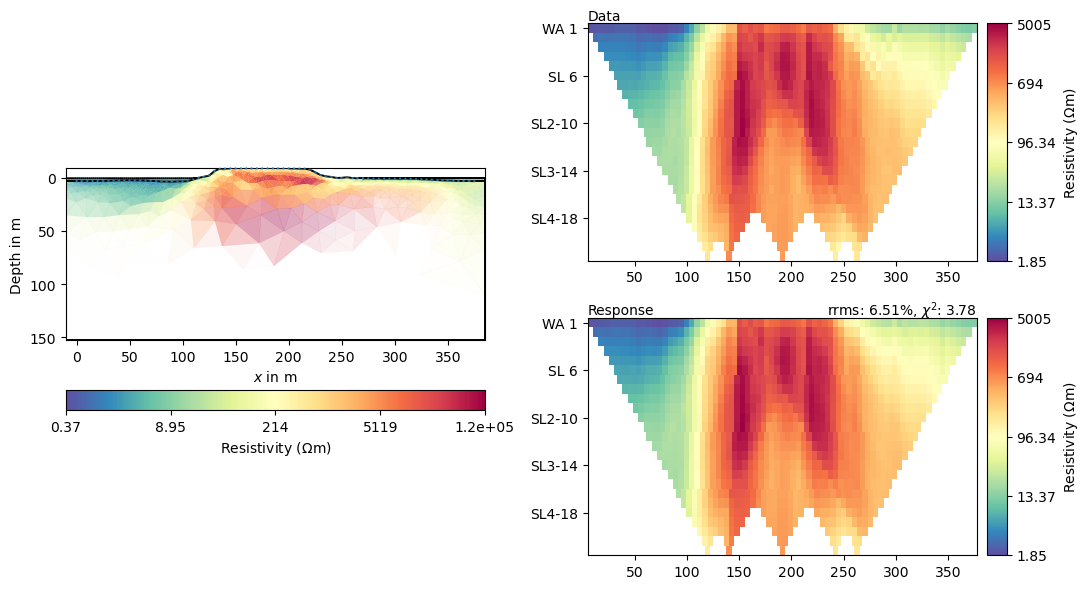

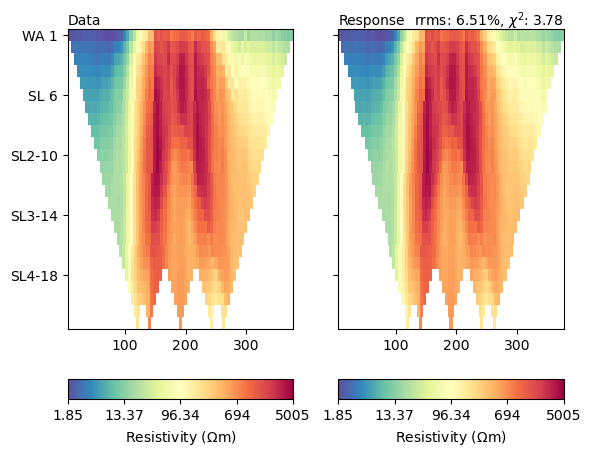

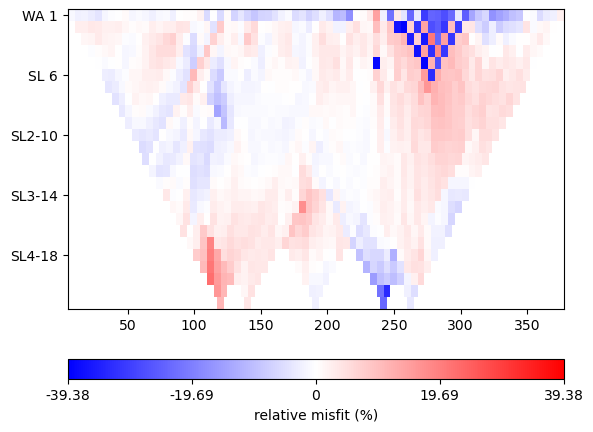

In [11]:
mgr.setMesh(mesh)


mgr.inv.setRegularization(limits=[0, 0], trans="log")
mgr.inv.setRegularization(3, single=True)
mgr.inv.setRegularization(4, single=True)
mgr.inv.setRegularization(2, zWeight=0.2)


mod2 = mgr.invert(data, lam=35, verbose=True, paraDX = 0.25, paraDZ= 0.25)

mgr.showResultAndFit()
mgr.showFit()
mgr.showMisfit()

06/01/25 - 08:53:04 - pyGIMLi - INFO - ERT Petrogeophysical Inversion
06/01/25 - 08:53:05 - pyGIMLi - INFO - Found 1 regions.
06/01/25 - 08:53:05 - pyGIMLi - INFO - Found 1 regions.
06/01/25 - 08:53:05 - pyGIMLi - INFO - Creating forward mesh from region infos.
06/01/25 - 08:53:05 - pyGIMLi - INFO - Creating refined mesh (H2) to solve forward task.
06/01/25 - 08:53:05 - pyGIMLi - INFO - Mesh for forward task: Mesh: Nodes: 2363 Cells: 4368 Boundaries: 3454
06/01/25 - 08:53:05 - pyGIMLi - INFO - Use median(data values)=422.28496788679416
06/01/25 - 08:53:05 - pyGIMLi - INFO - Created startmodel from forward operator: 1092, min/max=0.051295/0.051295
06/01/25 - 08:53:05 - pyGIMLi - INFO - Starting inversion.


fop: <pygimli.frameworks.modelling.PetroModelling object at 0x000002315672AC00>
Data transformation: <pgcore._pygimli_.RTransLin object at 0x000002315641B420>
Model transformation (cumulative):
	 0 <pgcore._pygimli_.RTransLogLU object at 0x000002314553C200>
min/max (data): 1.85/5005
min/max (error): 3%/8.9%
min/max (start model): 0.05/0.05
--------------------------------------------------------------------------------
inv.iter 0 ... chi² = 764775.71
--------------------------------------------------------------------------------
inv.iter 1 ... chi² = 86123.49 (dPhi = 88.74%) lam: 35.0
--------------------------------------------------------------------------------
inv.iter 2 ... chi² = 11111.39 (dPhi = 87.09%) lam: 35.0
--------------------------------------------------------------------------------
inv.iter 3 ... chi² = 1398.39 (dPhi = 87.37%) lam: 35.0
--------------------------------------------------------------------------------
inv.iter 4 ... chi² =  365.54 (dPhi = 73.60%) lam: 

(-40.0, 9.28)

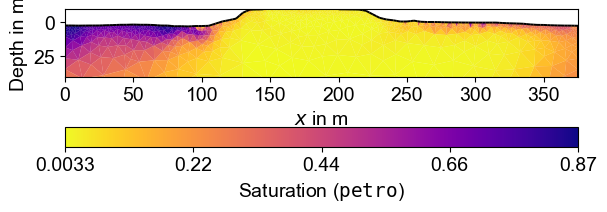

In [79]:
import numpy as np
import pygimli as pg

from pygimli import meshtools as mt
from pygimli.physics import ert
from pygimli.physics import traveltime as tt
from pygimli.physics.petro import transFwdArchieS as ArchieTrans
from pygimli.physics.petro import transFwdWyllieS as WyllieTrans
from pygimli.frameworks import (PetroInversionManager,
                                JointPetroInversionManager)

#ertTrans = ArchieTrans(rFluid=10, phi=0.47)
ertTrans30 = ArchieTrans(rFluid=0.1, phi=0.3)
pg.info("ERT Petrogeophysical Inversion")
ERTPetro30 = PetroInversionManager(petro=ertTrans30, mesh=mesh, mgr=mgr)
satERT30 = ERTPetro30.invert(data, limits=[0., 1.], lam=35,
                         verbose=True)
ERTPetro30.inv.echoStatus()

satKW = dict(cMap="plasma_r", logScale=False)
ax, _ = pg.show(ERTPetro30.paraDomain, ERTPetro30.paraModel(satERT30), **satKW, 
              label=r'Saturation (${\tt petro}$)')
ax.set_ylim(-40)


06/01/25 - 08:55:01 - pyGIMLi - INFO - ERT Petrogeophysical Inversion
06/01/25 - 08:55:01 - pyGIMLi - INFO - Found 1 regions.
06/01/25 - 08:55:01 - pyGIMLi - INFO - Found 1 regions.
06/01/25 - 08:55:01 - pyGIMLi - INFO - Creating forward mesh from region infos.
06/01/25 - 08:55:01 - pyGIMLi - INFO - Creating refined mesh (H2) to solve forward task.
06/01/25 - 08:55:01 - pyGIMLi - INFO - Mesh for forward task: Mesh: Nodes: 2363 Cells: 4368 Boundaries: 3454
06/01/25 - 08:55:01 - pyGIMLi - INFO - Use median(data values)=422.28496788679416
06/01/25 - 08:55:01 - pyGIMLi - INFO - Created startmodel from forward operator: 1092, min/max=0.038471/0.038471
06/01/25 - 08:55:01 - pyGIMLi - INFO - Starting inversion.


fop: <pygimli.frameworks.modelling.PetroModelling object at 0x000002315648A1B0>
Data transformation: <pgcore._pygimli_.RTransLin object at 0x000002315644B3D0>
Model transformation (cumulative):
	 0 <pgcore._pygimli_.RTransLogLU object at 0x00000231A4491AF0>
min/max (data): 1.85/5005
min/max (error): 3%/8.9%
min/max (start model): 0.04/0.04
--------------------------------------------------------------------------------
inv.iter 0 ... chi² = 764775.71
--------------------------------------------------------------------------------
inv.iter 1 ... chi² = 84924.26 (dPhi = 88.89%) lam: 35.0
--------------------------------------------------------------------------------
inv.iter 2 ... chi² = 10969.36 (dPhi = 87.08%) lam: 35.0
--------------------------------------------------------------------------------
inv.iter 3 ... chi² = 1211.99 (dPhi = 88.91%) lam: 35.0
--------------------------------------------------------------------------------
inv.iter 4 ... chi² =  268.46 (dPhi = 77.53%) lam: 

(-40.0, 9.28)

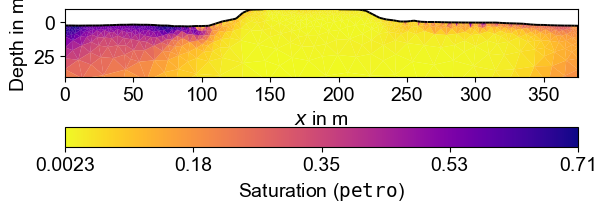

In [80]:
import numpy as np
import pygimli as pg

from pygimli import meshtools as mt
from pygimli.physics import ert
from pygimli.physics import traveltime as tt
from pygimli.physics.petro import transFwdArchieS as ArchieTrans
from pygimli.physics.petro import transFwdWyllieS as WyllieTrans
from pygimli.frameworks import (PetroInversionManager,
                                JointPetroInversionManager)

#ertTrans = ArchieTrans(rFluid=10, phi=0.47)
ertTrans40 = ArchieTrans(rFluid=0.1, phi=0.4)
pg.info("ERT Petrogeophysical Inversion")
ERTPetro40 = PetroInversionManager(petro=ertTrans40, mesh=mesh, mgr=mgr)
satERT40 = ERTPetro40.invert(data, limits=[0., 1.], lam=35,
                         verbose=True)
ERTPetro40.inv.echoStatus()

satKW = dict(cMap="plasma_r", logScale=False)
ax, _ = pg.show(ERTPetro40.paraDomain, ERTPetro40.paraModel(satERT40), **satKW, 
              label=r'Saturation (${\tt petro}$)')
ax.set_ylim(-40)

06/01/25 - 08:57:31 - pyGIMLi - INFO - ERT Petrogeophysical Inversion
06/01/25 - 08:57:31 - pyGIMLi - INFO - Found 1 regions.
06/01/25 - 08:57:31 - pyGIMLi - INFO - Found 1 regions.
06/01/25 - 08:57:31 - pyGIMLi - INFO - Creating forward mesh from region infos.
06/01/25 - 08:57:31 - pyGIMLi - INFO - Creating refined mesh (H2) to solve forward task.
06/01/25 - 08:57:31 - pyGIMLi - INFO - Mesh for forward task: Mesh: Nodes: 2363 Cells: 4368 Boundaries: 3454
06/01/25 - 08:57:31 - pyGIMLi - INFO - Use median(data values)=422.28496788679416
06/01/25 - 08:57:31 - pyGIMLi - INFO - Created startmodel from forward operator: 1092, min/max=0.030777/0.030777
06/01/25 - 08:57:31 - pyGIMLi - INFO - Starting inversion.


fop: <pygimli.frameworks.modelling.PetroModelling object at 0x000002319714BE70>
Data transformation: <pgcore._pygimli_.RTransLin object at 0x000002319710E700>
Model transformation (cumulative):
	 0 <pgcore._pygimli_.RTransLogLU object at 0x00000231A4492260>
min/max (data): 1.85/5005
min/max (error): 3%/8.9%
min/max (start model): 0.03/0.03
--------------------------------------------------------------------------------
inv.iter 0 ... chi² = 764775.71
--------------------------------------------------------------------------------
inv.iter 1 ... chi² = 84144.02 (dPhi = 89.00%) lam: 35.0
--------------------------------------------------------------------------------
inv.iter 2 ... chi² = 10756.57 (dPhi = 87.21%) lam: 35.0
--------------------------------------------------------------------------------
inv.iter 3 ... chi² = 1142.25 (dPhi = 89.33%) lam: 35.0
--------------------------------------------------------------------------------
inv.iter 4 ... chi² =  214.86 (dPhi = 80.84%) lam: 

(-40.0, 9.28)

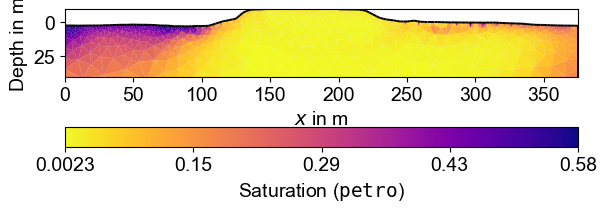

In [81]:
import numpy as np
import pygimli as pg

from pygimli import meshtools as mt
from pygimli.physics import ert
from pygimli.physics import traveltime as tt
from pygimli.physics.petro import transFwdArchieS as ArchieTrans
from pygimli.physics.petro import transFwdWyllieS as WyllieTrans
from pygimli.frameworks import (PetroInversionManager,
                                JointPetroInversionManager)

#ertTrans = ArchieTrans(rFluid=10, phi=0.47)
ertTrans50 = ArchieTrans(rFluid=0.1, phi=0.5)
pg.info("ERT Petrogeophysical Inversion")
ERTPetro50 = PetroInversionManager(petro=ertTrans50, mesh=mesh, mgr=mgr)
satERT50 = ERTPetro50.invert(data, limits=[0., 1.], lam=35,
                         verbose=True)
ERTPetro50.inv.echoStatus()

satKW = dict(cMap="plasma_r", logScale=False)
ax, _ = pg.show(ERTPetro50.paraDomain, ERTPetro50.paraModel(satERT50), **satKW, 
              label=r'Saturation (${\tt petro}$)')
ax.set_ylim(-40)

(-40.0, 9.28)

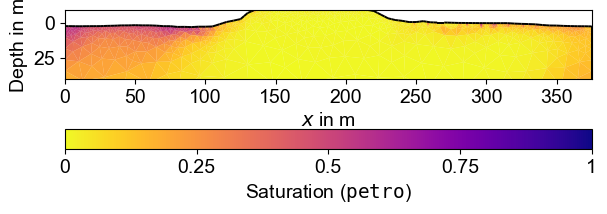

In [78]:
satKW = dict(cMap="plasma_r", logScale=False, cMin=0, cMax=1)
ax, _ = pg.show(ERTPetro30.paraDomain, ERTPetro30.paraModel(satERT50), **satKW, 
              label=r'Saturation (${\tt petro}$)')
ax.set_ylim(-40)

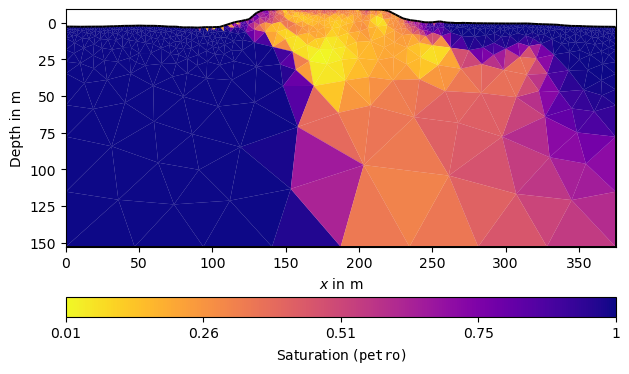

In [49]:
ax, _ = pg.show(ERTPetro.paraDomain, ERTPetro.paraModel(satERT), **satKW, 
              label=r'Saturation (${\tt petro}$)')



13/12/24 - 14:39:32 - pyGIMLi - INFO - Found 4 regions.
13/12/24 - 14:39:32 - pyGIMLi - INFO - (ERTModelling) Region with smallest marker (1) set to background.
13/12/24 - 14:39:32 - pyGIMLi - INFO - Creating forward mesh from region infos.
13/12/24 - 14:39:33 - pyGIMLi - INFO - Creating refined mesh (H2) to solve forward task.
13/12/24 - 14:39:33 - pyGIMLi - INFO - Mesh for forward task: Mesh: Nodes: 7028 Cells: 13292 Boundaries: 10350
13/12/24 - 14:39:33 - pyGIMLi - INFO - Use median(data values)=422.28496788679416
13/12/24 - 14:39:33 - pyGIMLi - INFO - Created startmodel from forward operator: 2411, min/max=422.284968/422.284968
13/12/24 - 14:39:33 - pyGIMLi - INFO - Starting inversion.


fop: <pygimli.physics.ert.ertModelling.ERTModelling object at 0x0000017B5F595080>
Data transformation: <pgcore._pygimli_.RTransLogLU object at 0x0000017B61549710>
Model transformation (cumulative):
	 0 <pgcore._pygimli_.RTransLogLU object at 0x0000017B90936110>
	 1 <pgcore._pygimli_.RTransLogLU object at 0x0000017B90936180>
	 2 <pgcore._pygimli_.RTransLogLU object at 0x0000017B909361F0>
min/max (data): 1.85/5005
min/max (error): 3%/8.9%
min/max (start model): 422/422
--------------------------------------------------------------------------------
inv.iter 0 ... chi² = 2488.58
--------------------------------------------------------------------------------
inv.iter 1 ... chi² =  833.48 (dPhi = 66.48%) lam: 35.0
--------------------------------------------------------------------------------
inv.iter 2 ... chi² =  189.47 (dPhi = 77.14%) lam: 35.0
--------------------------------------------------------------------------------
inv.iter 3 ... chi² =   95.75 (dPhi = 49.21%) lam: 35.0
------

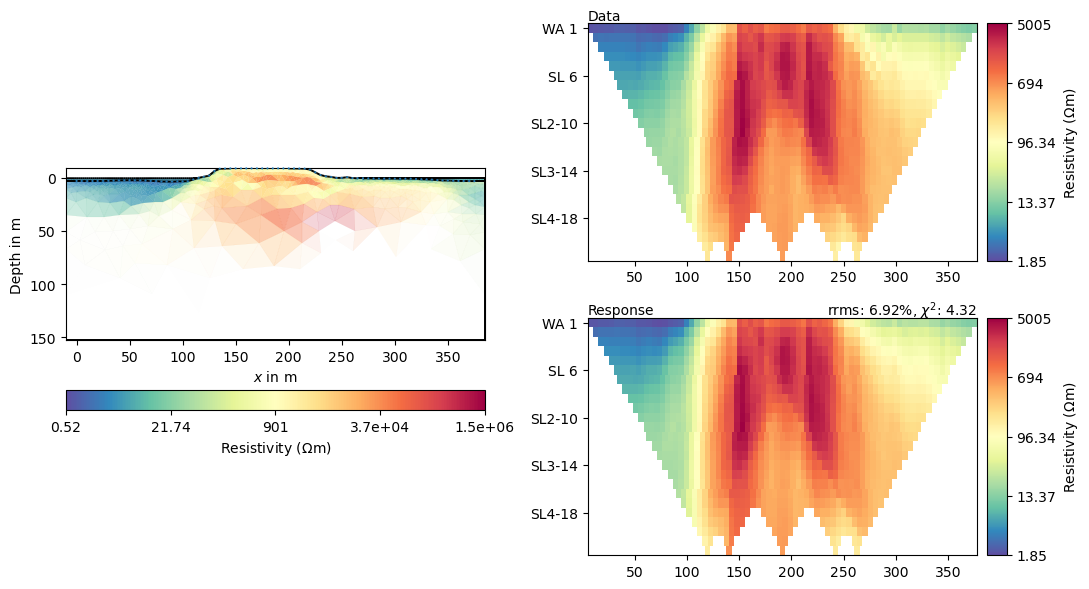

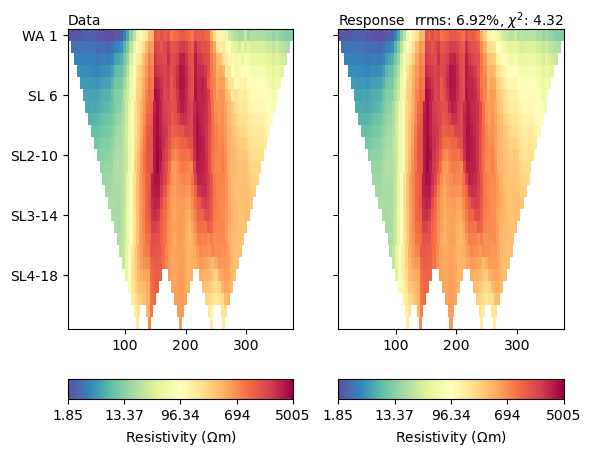

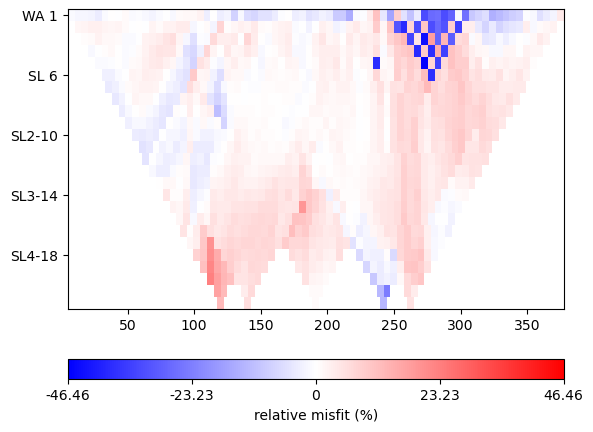

In [27]:
mgr.setMesh(mesh)


mgr.inv.setRegularization(limits=[0, 0], trans="log")
mgr.inv.setRegularization(3, single=True)
mgr.inv.setRegularization(4, single=True)
mgr.inv.setRegularization(2, zWeight=0.1)


mod2 = mgr.invert(data, lam=35, verbose=True, paraDX = 0.25, paraDZ= 0.25)

mgr.showResultAndFit()
mgr.showFit()
mgr.showMisfit()

lambda=20, zweight=0.1

(<Axes: >, <matplotlib.colorbar.Colorbar at 0x17b62e58450>)

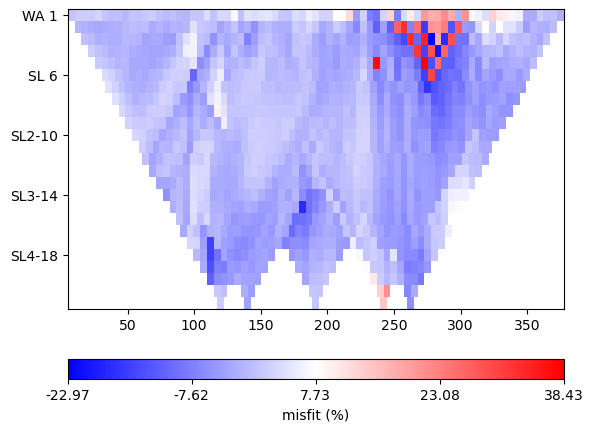

In [14]:
misfit = mgr.inv.response / mgr.data['rhoa'] * 100 - 100
pg.show(mgr.data, misfit, cMap="bwr", label="misfit (%)")  

lambda = 35, zweight=0.1

(<Axes: >, <matplotlib.colorbar.Colorbar at 0x17b88176150>)

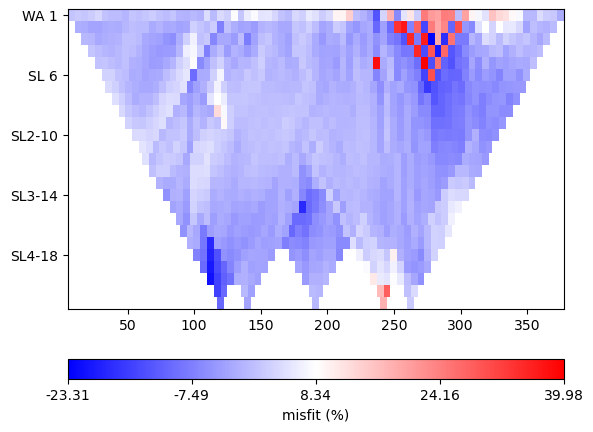

In [16]:
misfit = mgr.inv.response / mgr.data['rhoa'] * 100 - 100
pg.show(mgr.data, misfit, cMap="bwr", label="misfit (%)")  

lambda=35, zWeight=0.2

(<Axes: >, <matplotlib.colorbar.Colorbar at 0x17b66ec6290>)

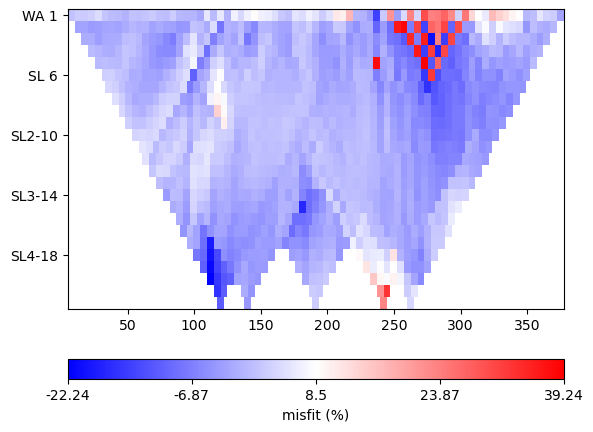

In [18]:
misfit = mgr.inv.response / mgr.data['rhoa'] * 100 - 100
pg.show(mgr.data, misfit, cMap="bwr", label="misfit (%)")  

lambda = 35, zweight=0.2, RobustData=1

(<Axes: >, <matplotlib.colorbar.Colorbar at 0x17b912d9d90>)

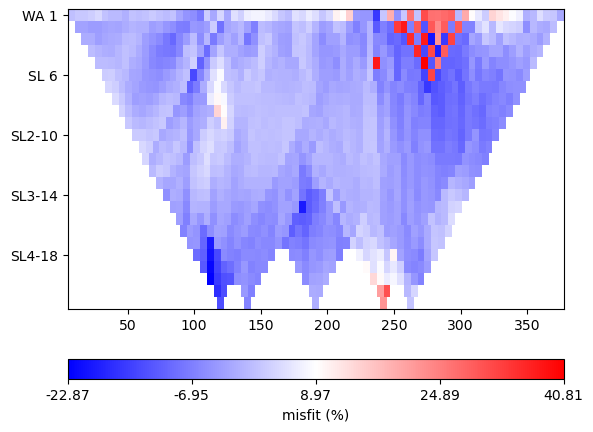

In [20]:
misfit = mgr.inv.response / mgr.data['rhoa'] * 100 - 100
pg.show(mgr.data, misfit, cMap="bwr", label="misfit (%)")  

lambda-35, zWeight=0.2, BlockyModel=True

(<Axes: >, <matplotlib.colorbar.Colorbar at 0x17b90949510>)

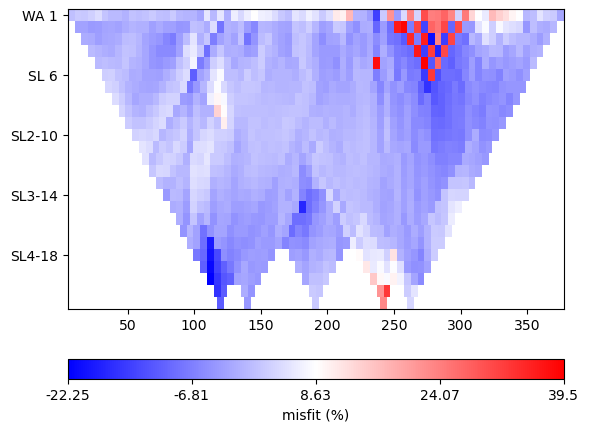

In [23]:
misfit = mgr.inv.response / mgr.data['rhoa'] * 100 - 100
pg.show(mgr.data, misfit, cMap="bwr", label="misfit (%)")  

lambda=35, zweight=0.2, BlockyModel-True, RobustData-True

(<Axes: >, <matplotlib.colorbar.Colorbar at 0x17b90755150>)

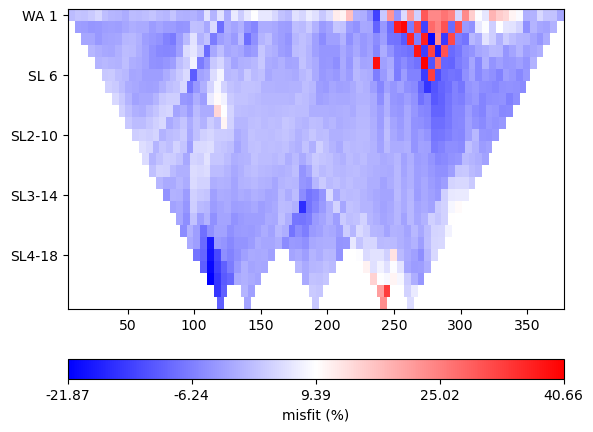

In [29]:
misfit = mgr.inv.response / mgr.data['rhoa'] * 100 - 100
pg.show(mgr.data, misfit, cMap="bwr", label="misfit (%)")  

13/12/24 - 11:04:34 - pyGIMLi - INFO - Found 4 regions.
13/12/24 - 11:04:34 - pyGIMLi - INFO - (ERTModelling) Region with smallest marker (1) set to background.
13/12/24 - 11:04:34 - pyGIMLi - INFO - Creating forward mesh from region infos.
13/12/24 - 11:04:34 - pyGIMLi - INFO - Creating refined mesh (H2) to solve forward task.
13/12/24 - 11:04:35 - pyGIMLi - INFO - Mesh for forward task: Mesh: Nodes: 7028 Cells: 13292 Boundaries: 10350
13/12/24 - 11:04:35 - pyGIMLi - INFO - Use median(data values)=422.28496788679416
13/12/24 - 11:04:35 - pyGIMLi - INFO - Created startmodel from forward operator: 2411, min/max=422.284968/422.284968
13/12/24 - 11:04:35 - pyGIMLi - INFO - Starting inversion.


fop: <pygimli.physics.ert.ertModelling.ERTModelling object at 0x0000017B5F595080>
Data transformation: <pgcore._pygimli_.RTransLogLU object at 0x0000017B61549710>
Model transformation (cumulative):
	 0 <pgcore._pygimli_.RTransLogLU object at 0x0000017B62F3FA70>
	 1 <pgcore._pygimli_.RTransLogLU object at 0x0000017B62F3F060>
	 2 <pgcore._pygimli_.RTransLogLU object at 0x0000017B62F3F290>
min/max (data): 1.85/5005
min/max (error): 3%/8.9%
min/max (start model): 422/422
--------------------------------------------------------------------------------
inv.iter 0 ... chi² = 2488.58
--------------------------------------------------------------------------------
inv.iter 1 ... chi² =  793.08 (dPhi = 68.10%) lam: 10.0
--------------------------------------------------------------------------------
inv.iter 2 ... chi² =  205.69 (dPhi = 74.00%) lam: 10.0
--------------------------------------------------------------------------------
inv.iter 3 ... chi² =  103.04 (dPhi = 49.70%) lam: 10.0
------

13/12/24 - 11:09:36 - pyGIMLi - INFO - Use median(data values)=422.28496788679416
13/12/24 - 11:09:36 - pyGIMLi - INFO - Created startmodel from forward operator: 2411, min/max=422.284968/422.284968
13/12/24 - 11:09:36 - pyGIMLi - INFO - Starting inversion.


chi² =    2.90 (dPhi = 0.83%) lam: 10.0
################################################################################
#                Abort criterion reached: dPhi = 0.83 (< 2.0%)                 #
################################################################################
fop: <pygimli.physics.ert.ertModelling.ERTModelling object at 0x0000017B5F595080>
Data transformation: <pgcore._pygimli_.RTransLogLU object at 0x0000017B61549710>
Model transformation (cumulative):
	 0 <pgcore._pygimli_.RTransLogLU object at 0x0000017B62F3F060>
	 1 <pgcore._pygimli_.RTransLogLU object at 0x0000017B62F3F290>
	 2 <pgcore._pygimli_.RTransLogLU object at 0x0000017B62F3E5E0>
min/max (data): 1.85/5005
min/max (error): 3%/8.9%
min/max (start model): 422/422
--------------------------------------------------------------------------------
inv.iter 0 ... chi² = 2488.58
--------------------------------------------------------------------------------
inv.iter 1 ... chi² =  735.59 (dPhi = 70.41%) lam: 15

13/12/24 - 11:15:15 - pyGIMLi - INFO - Use median(data values)=422.28496788679416
13/12/24 - 11:15:15 - pyGIMLi - INFO - Created startmodel from forward operator: 2411, min/max=422.284968/422.284968
13/12/24 - 11:15:15 - pyGIMLi - INFO - Starting inversion.


chi² =    3.00 (dPhi = 0.58%) lam: 15.2
################################################################################
#                Abort criterion reached: dPhi = 0.58 (< 2.0%)                 #
################################################################################
fop: <pygimli.physics.ert.ertModelling.ERTModelling object at 0x0000017B5F595080>
Data transformation: <pgcore._pygimli_.RTransLogLU object at 0x0000017B61549710>
Model transformation (cumulative):
	 0 <pgcore._pygimli_.RTransLogLU object at 0x0000017B62F3F060>
	 1 <pgcore._pygimli_.RTransLogLU object at 0x0000017B62F3F290>
	 2 <pgcore._pygimli_.RTransLogLU object at 0x0000017B62F3F610>
min/max (data): 1.85/5005
min/max (error): 3%/8.9%
min/max (start model): 422/422
--------------------------------------------------------------------------------
inv.iter 0 ... chi² = 2488.58
--------------------------------------------------------------------------------
inv.iter 1 ... chi² =  663.21 (dPhi = 73.30%) lam: 23

13/12/24 - 11:20:34 - pyGIMLi - INFO - Use median(data values)=422.28496788679416
13/12/24 - 11:20:34 - pyGIMLi - INFO - Created startmodel from forward operator: 2411, min/max=422.284968/422.284968
13/12/24 - 11:20:34 - pyGIMLi - INFO - Starting inversion.


chi² =    4.10 (dPhi = 1.52%) lam: 23.1
################################################################################
#                Abort criterion reached: dPhi = 1.52 (< 2.0%)                 #
################################################################################
fop: <pygimli.physics.ert.ertModelling.ERTModelling object at 0x0000017B5F595080>
Data transformation: <pgcore._pygimli_.RTransLogLU object at 0x0000017B61549710>
Model transformation (cumulative):
	 0 <pgcore._pygimli_.RTransLogLU object at 0x0000017B62F3F060>
	 1 <pgcore._pygimli_.RTransLogLU object at 0x0000017B62F3F290>
	 2 <pgcore._pygimli_.RTransLogLU object at 0x0000017B62F3F610>
min/max (data): 1.85/5005
min/max (error): 3%/8.9%
min/max (start model): 422/422
--------------------------------------------------------------------------------
inv.iter 0 ... chi² = 2488.58
--------------------------------------------------------------------------------
inv.iter 1 ... chi² =  604.46 (dPhi = 75.65%) lam: 35

13/12/24 - 11:24:56 - pyGIMLi - INFO - Use median(data values)=422.28496788679416
13/12/24 - 11:24:56 - pyGIMLi - INFO - Created startmodel from forward operator: 2411, min/max=422.284968/422.284968
13/12/24 - 11:24:56 - pyGIMLi - INFO - Starting inversion.


chi² =    3.66 (dPhi = 1.37%) lam: 35.1
################################################################################
#                Abort criterion reached: dPhi = 1.37 (< 2.0%)                 #
################################################################################
fop: <pygimli.physics.ert.ertModelling.ERTModelling object at 0x0000017B5F595080>
Data transformation: <pgcore._pygimli_.RTransLogLU object at 0x0000017B61549710>
Model transformation (cumulative):
	 0 <pgcore._pygimli_.RTransLogLU object at 0x0000017B62F3F060>
	 1 <pgcore._pygimli_.RTransLogLU object at 0x0000017B62F3F290>
	 2 <pgcore._pygimli_.RTransLogLU object at 0x0000017B62F3E5E0>
min/max (data): 1.85/5005
min/max (error): 3%/8.9%
min/max (start model): 422/422
--------------------------------------------------------------------------------
inv.iter 0 ... chi² = 2488.58
--------------------------------------------------------------------------------
inv.iter 1 ... chi² =  539.51 (dPhi = 78.25%) lam: 53

13/12/24 - 11:29:16 - pyGIMLi - INFO - Use median(data values)=422.28496788679416
13/12/24 - 11:29:16 - pyGIMLi - INFO - Created startmodel from forward operator: 2411, min/max=422.284968/422.284968
13/12/24 - 11:29:16 - pyGIMLi - INFO - Starting inversion.


chi² =    4.35 (dPhi = 1.71%) lam: 53.4
################################################################################
#                Abort criterion reached: dPhi = 1.71 (< 2.0%)                 #
################################################################################
fop: <pygimli.physics.ert.ertModelling.ERTModelling object at 0x0000017B5F595080>
Data transformation: <pgcore._pygimli_.RTransLogLU object at 0x0000017B61549710>
Model transformation (cumulative):
	 0 <pgcore._pygimli_.RTransLogLU object at 0x0000017B62F3F060>
	 1 <pgcore._pygimli_.RTransLogLU object at 0x0000017B62F3F290>
	 2 <pgcore._pygimli_.RTransLogLU object at 0x0000017B62F3F610>
min/max (data): 1.85/5005
min/max (error): 3%/8.9%
min/max (start model): 422/422
--------------------------------------------------------------------------------
inv.iter 0 ... chi² = 2488.58
--------------------------------------------------------------------------------
inv.iter 1 ... chi² =  482.16 (dPhi = 80.54%) lam: 81

13/12/24 - 11:32:59 - pyGIMLi - INFO - Use median(data values)=422.28496788679416
13/12/24 - 11:32:59 - pyGIMLi - INFO - Created startmodel from forward operator: 2411, min/max=422.284968/422.284968
13/12/24 - 11:32:59 - pyGIMLi - INFO - Starting inversion.


chi² =    4.88 (dPhi = 0.77%) lam: 81.1
################################################################################
#                Abort criterion reached: dPhi = 0.77 (< 2.0%)                 #
################################################################################
fop: <pygimli.physics.ert.ertModelling.ERTModelling object at 0x0000017B5F595080>
Data transformation: <pgcore._pygimli_.RTransLogLU object at 0x0000017B61549710>
Model transformation (cumulative):
	 0 <pgcore._pygimli_.RTransLogLU object at 0x0000017B62F3F060>
	 1 <pgcore._pygimli_.RTransLogLU object at 0x0000017B62F3F290>
	 2 <pgcore._pygimli_.RTransLogLU object at 0x0000017B62F3FCA0>
min/max (data): 1.85/5005
min/max (error): 3%/8.9%
min/max (start model): 422/422
--------------------------------------------------------------------------------
inv.iter 0 ... chi² = 2488.58
--------------------------------------------------------------------------------
inv.iter 1 ... chi² =  430.93 (dPhi = 82.58%) lam: 12

13/12/24 - 11:36:33 - pyGIMLi - INFO - Use median(data values)=422.28496788679416
13/12/24 - 11:36:33 - pyGIMLi - INFO - Created startmodel from forward operator: 2411, min/max=422.284968/422.284968
13/12/24 - 11:36:33 - pyGIMLi - INFO - Starting inversion.


chi² =    5.76 (dPhi = 0.49%) lam: 123.3
################################################################################
#                Abort criterion reached: dPhi = 0.49 (< 2.0%)                 #
################################################################################
fop: <pygimli.physics.ert.ertModelling.ERTModelling object at 0x0000017B5F595080>
Data transformation: <pgcore._pygimli_.RTransLogLU object at 0x0000017B61549710>
Model transformation (cumulative):
	 0 <pgcore._pygimli_.RTransLogLU object at 0x0000017B62F3FA70>
	 1 <pgcore._pygimli_.RTransLogLU object at 0x0000017B62F3F060>
	 2 <pgcore._pygimli_.RTransLogLU object at 0x0000017B62F3F290>
min/max (data): 1.85/5005
min/max (error): 3%/8.9%
min/max (start model): 422/422
--------------------------------------------------------------------------------
inv.iter 0 ... chi² = 2488.58
--------------------------------------------------------------------------------
inv.iter 1 ... chi² =  388.18 (dPhi = 84.28%) lam: 1

13/12/24 - 11:39:01 - pyGIMLi - INFO - Use median(data values)=422.28496788679416
13/12/24 - 11:39:01 - pyGIMLi - INFO - Created startmodel from forward operator: 2411, min/max=422.284968/422.284968
13/12/24 - 11:39:01 - pyGIMLi - INFO - Starting inversion.


chi² =    7.11 (dPhi = 1.55%) lam: 187.4
################################################################################
#                Abort criterion reached: dPhi = 1.55 (< 2.0%)                 #
################################################################################
fop: <pygimli.physics.ert.ertModelling.ERTModelling object at 0x0000017B5F595080>
Data transformation: <pgcore._pygimli_.RTransLogLU object at 0x0000017B61549710>
Model transformation (cumulative):
	 0 <pgcore._pygimli_.RTransLogLU object at 0x0000017B62F3FA70>
	 1 <pgcore._pygimli_.RTransLogLU object at 0x0000017B62F3F060>
	 2 <pgcore._pygimli_.RTransLogLU object at 0x0000017B62F3E5E0>
min/max (data): 1.85/5005
min/max (error): 3%/8.9%
min/max (start model): 422/422
--------------------------------------------------------------------------------
inv.iter 0 ... chi² = 2488.58
--------------------------------------------------------------------------------
inv.iter 1 ... chi² =  353.64 (dPhi = 85.65%) lam: 2

13/12/24 - 11:41:40 - pyGIMLi - INFO - Use median(data values)=422.28496788679416
13/12/24 - 11:41:40 - pyGIMLi - INFO - Created startmodel from forward operator: 2411, min/max=422.284968/422.284968
13/12/24 - 11:41:40 - pyGIMLi - INFO - Starting inversion.


chi² =    8.39 (dPhi = 1.12%) lam: 284.8
################################################################################
#                Abort criterion reached: dPhi = 1.12 (< 2.0%)                 #
################################################################################
fop: <pygimli.physics.ert.ertModelling.ERTModelling object at 0x0000017B5F595080>
Data transformation: <pgcore._pygimli_.RTransLogLU object at 0x0000017B61549710>
Model transformation (cumulative):
	 0 <pgcore._pygimli_.RTransLogLU object at 0x0000017B62F3F610>
	 1 <pgcore._pygimli_.RTransLogLU object at 0x0000017B62F3FA70>
	 2 <pgcore._pygimli_.RTransLogLU object at 0x0000017B62F3F060>
min/max (data): 1.85/5005
min/max (error): 3%/8.9%
min/max (start model): 422/422
--------------------------------------------------------------------------------
inv.iter 0 ... chi² = 2488.58
--------------------------------------------------------------------------------
inv.iter 1 ... chi² =  330.08 (dPhi = 86.57%) lam: 4

13/12/24 - 11:43:53 - pyGIMLi - INFO - Use median(data values)=422.28496788679416
13/12/24 - 11:43:53 - pyGIMLi - INFO - Created startmodel from forward operator: 2411, min/max=422.284968/422.284968
13/12/24 - 11:43:53 - pyGIMLi - INFO - Starting inversion.


chi² =   10.52 (dPhi = 8.51%) lam: 432.9
--------------------------------------------------------------------------------
inv.iter 6 ... chi² =   10.21 (dPhi = 1.10%) lam: 432.9
################################################################################
#                 Abort criterion reached: dPhi = 1.1 (< 2.0%)                 #
################################################################################
fop: <pygimli.physics.ert.ertModelling.ERTModelling object at 0x0000017B5F595080>
Data transformation: <pgcore._pygimli_.RTransLogLU object at 0x0000017B61549710>
Model transformation (cumulative):
	 0 <pgcore._pygimli_.RTransLogLU object at 0x0000017B62F3F610>
	 1 <pgcore._pygimli_.RTransLogLU object at 0x0000017B62F3FA70>
	 2 <pgcore._pygimli_.RTransLogLU object at 0x0000017B62F3E5E0>
min/max (data): 1.85/5005
min/max (error): 3%/8.9%
min/max (start model): 422/422
--------------------------------------------------------------------------------
inv.iter 0 ... chi² = 2488

13/12/24 - 11:46:14 - pyGIMLi - INFO - Use median(data values)=422.28496788679416
13/12/24 - 11:46:14 - pyGIMLi - INFO - Created startmodel from forward operator: 2411, min/max=422.284968/422.284968
13/12/24 - 11:46:14 - pyGIMLi - INFO - Starting inversion.


chi² =   12.43 (dPhi = 0.34%) lam: 657.9
################################################################################
#                Abort criterion reached: dPhi = 0.34 (< 2.0%)                 #
################################################################################
fop: <pygimli.physics.ert.ertModelling.ERTModelling object at 0x0000017B5F595080>
Data transformation: <pgcore._pygimli_.RTransLogLU object at 0x0000017B61549710>
Model transformation (cumulative):
	 0 <pgcore._pygimli_.RTransLogLU object at 0x0000017B62F3F610>
	 1 <pgcore._pygimli_.RTransLogLU object at 0x0000017B62F3FA70>
	 2 <pgcore._pygimli_.RTransLogLU object at 0x0000017B62F3E5E0>
min/max (data): 1.85/5005
min/max (error): 3%/8.9%
min/max (start model): 422/422
--------------------------------------------------------------------------------
inv.iter 0 ... chi² = 2488.58
--------------------------------------------------------------------------------
inv.iter 1 ... chi² =  297.44 (dPhi = 87.80%) lam: 1

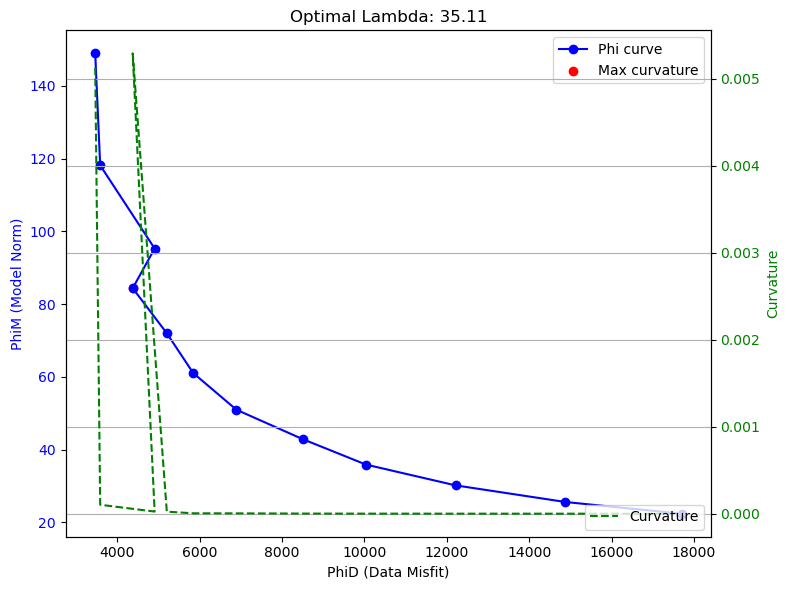

In [21]:
mgr.setMesh(mesh)


mgr.inv.setRegularization(limits=[0, 0], trans="log")
mgr.inv.setRegularization(3, single=True)
mgr.inv.setRegularization(4, single=True)
mgr.inv.setRegularization(2, zWeight=0.2)

lambdas = np.logspace(1, 3, 12)
phiD = []
phiM = []
for lam in lambdas:
    mgr.invert(data, lam=lam, verbose=True, paraDX = 0.25, paraDZ= 0.25, RobustData=True)
    phiD.append(mgr.inv.phiData())
    phiM.append(mgr.inv.phiModel())

phiD = np.array(phiD)
phiM = np.array(phiM)
dphiD = np.gradient(phiD, lambdas)  # First derivative of phiD w.r.t. lambdas
dphiM = np.gradient(phiM, lambdas)  # First derivative of phiM w.r.t. lambdas
ddphiD = np.gradient(dphiD, lambdas)  # Second derivative of phiD
ddphiM = np.gradient(dphiM, lambdas)  # Second derivative of phiM

# Compute curvature
curvature = np.abs(dphiD * ddphiM - dphiM * ddphiD) / (dphiD**2 + dphiM**2)**1.5

# Find maximum curvature
max_curvature_index = np.argmax(curvature)
optimal_lambda = lambdas[max_curvature_index]

# Plot Phi curve and curvature
fig, ax1 = plt.subplots(figsize=(8, 6))

# Plot Phi curve
ax1.plot(phiD, phiM, '-o', label='Phi curve', color='blue')
ax1.scatter(phiD[max_curvature_index], phiM[max_curvature_index], color='red', label='Max curvature')
ax1.set_xlabel('PhiD (Data Misfit)')
ax1.set_ylabel('PhiM (Model Norm)', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')
ax1.legend(loc='upper right')

# Add curvature plot on secondary axis
ax2 = ax1.twinx()
ax2.plot(phiD, curvature, '--', label='Curvature', color='green')
ax2.set_ylabel('Curvature', color='green')
ax2.tick_params(axis='y', labelcolor='green')
ax2.legend(loc='lower right')

plt.title(f'Optimal Lambda: {optimal_lambda:.2f}')
plt.grid()
plt.tight_layout()
plt.show()

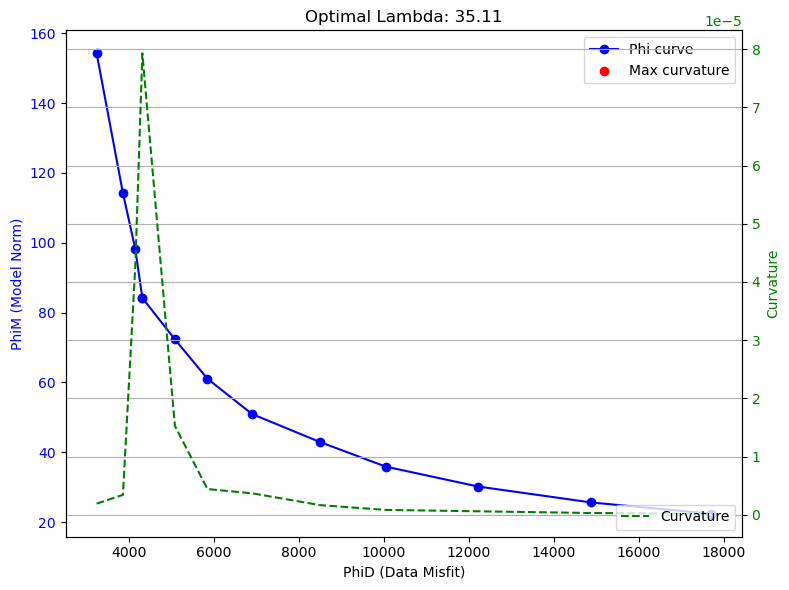

In [80]:
phiD = np.array(phiD)
phiM = np.array(phiM)
dphiD = np.gradient(phiD, lambdas)  # First derivative of phiD w.r.t. lambdas
dphiM = np.gradient(phiM, lambdas)  # First derivative of phiM w.r.t. lambdas
ddphiD = np.gradient(dphiD, lambdas)  # Second derivative of phiD
ddphiM = np.gradient(dphiM, lambdas)  # Second derivative of phiM

# Compute curvature
curvature = np.abs(dphiD * ddphiM - dphiM * ddphiD) / (dphiD**2 + dphiM**2)**1.5

# Find maximum curvature
max_curvature_index = np.argmax(curvature)
optimal_lambda = lambdas[max_curvature_index]

# Plot Phi curve and curvature
fig, ax1 = plt.subplots(figsize=(8, 6))

# Plot Phi curve
ax1.plot(phiD, phiM, '-o', label='Phi curve', color='blue')
ax1.scatter(phiD[max_curvature_index], phiM[max_curvature_index], color='red', label='Max curvature')
ax1.set_xlabel('PhiD (Data Misfit)')
ax1.set_ylabel('PhiM (Model Norm)', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')
ax1.legend(loc='upper right')

# Add curvature plot on secondary axis
ax2 = ax1.twinx()
ax2.plot(phiD, curvature, '--', label='Curvature', color='green')
ax2.set_ylabel('Curvature', color='green')
ax2.tick_params(axis='y', labelcolor='green')
ax2.legend(loc='lower right')

plt.title(f'Optimal Lambda: {optimal_lambda:.2f}')
plt.grid()
plt.tight_layout()
plt.show()

09/12/24 - 11:22:34 - pyGIMLi - INFO - Found 4 regions.
09/12/24 - 11:22:34 - pyGIMLi - INFO - (ERTModelling) Region with smallest marker (1) set to background.
09/12/24 - 11:22:38 - pyGIMLi - INFO - Creating forward mesh from region infos.
09/12/24 - 11:22:38 - pyGIMLi - INFO - Creating refined mesh (H2) to solve forward task.
09/12/24 - 11:22:39 - pyGIMLi - INFO - Mesh for forward task: Mesh: Nodes: 7028 Cells: 13292 Boundaries: 10350
09/12/24 - 11:22:40 - pyGIMLi - INFO - Use median(data values)=422.28496788679416
09/12/24 - 11:22:40 - pyGIMLi - INFO - Created startmodel from forward operator: 2411, min/max=422.284968/422.284968
09/12/24 - 11:22:40 - pyGIMLi - INFO - Starting inversion.


fop: <pygimli.physics.ert.ertModelling.ERTModelling object at 0x000002909806C9A0>
Data transformation: <pgcore._pygimli_.RTransLogLU object at 0x000002909806CB80>
Model transformation (cumulative):
	 0 <pgcore._pygimli_.RTransLogLU object at 0x00000291242A4C80>
	 1 <pgcore._pygimli_.RTransLogLU object at 0x00000291242DD700>
	 2 <pgcore._pygimli_.RTransLogLU object at 0x00000291244D66C0>
min/max (data): 1.85/5005
min/max (error): 3%/8.9%
min/max (start model): 422/422
--------------------------------------------------------------------------------
inv.iter 0 ... chi² = 2488.58
--------------------------------------------------------------------------------
inv.iter 1 ... chi² =  790.98 (dPhi = 68.19%) lam: 10.0
--------------------------------------------------------------------------------
inv.iter 2 ... chi² =  207.63 (dPhi = 73.68%) lam: 10.0
--------------------------------------------------------------------------------
inv.iter 3 ... chi² =  105.48 (dPhi = 48.99%) lam: 10.0
------

09/12/24 - 11:38:04 - pyGIMLi - INFO - Use median(data values)=422.28496788679416
09/12/24 - 11:38:04 - pyGIMLi - INFO - Created startmodel from forward operator: 2411, min/max=422.284968/422.284968
09/12/24 - 11:38:04 - pyGIMLi - INFO - Starting inversion.


chi² =    2.71 (dPhi = 0.64%) lam: 10.0
################################################################################
#                Abort criterion reached: dPhi = 0.64 (< 2.0%)                 #
################################################################################
fop: <pygimli.physics.ert.ertModelling.ERTModelling object at 0x000002909806C9A0>
Data transformation: <pgcore._pygimli_.RTransLogLU object at 0x000002909806CB80>
Model transformation (cumulative):
	 0 <pgcore._pygimli_.RTransLogLU object at 0x0000029124B14900>
	 1 <pgcore._pygimli_.RTransLogLU object at 0x000002911E141770>
	 2 <pgcore._pygimli_.RTransLogLU object at 0x000002911E142F10>
min/max (data): 1.85/5005
min/max (error): 3%/8.9%
min/max (start model): 422/422
--------------------------------------------------------------------------------
inv.iter 0 ... chi² = 2488.58
--------------------------------------------------------------------------------
inv.iter 1 ... chi² =  733.23 (dPhi = 70.50%) lam: 15

09/12/24 - 11:44:48 - pyGIMLi - INFO - Use median(data values)=422.28496788679416
09/12/24 - 11:44:48 - pyGIMLi - INFO - Created startmodel from forward operator: 2411, min/max=422.284968/422.284968
09/12/24 - 11:44:48 - pyGIMLi - INFO - Starting inversion.


chi² =    3.23 (dPhi = 0.56%) lam: 15.2
################################################################################
#                Abort criterion reached: dPhi = 0.56 (< 2.0%)                 #
################################################################################
fop: <pygimli.physics.ert.ertModelling.ERTModelling object at 0x000002909806C9A0>
Data transformation: <pgcore._pygimli_.RTransLogLU object at 0x000002909806CB80>
Model transformation (cumulative):
	 0 <pgcore._pygimli_.RTransLogLU object at 0x00000291242A6B20>
	 1 <pgcore._pygimli_.RTransLogLU object at 0x000002911E1423B0>
	 2 <pgcore._pygimli_.RTransLogLU object at 0x000002911E141770>
min/max (data): 1.85/5005
min/max (error): 3%/8.9%
min/max (start model): 422/422
--------------------------------------------------------------------------------
inv.iter 0 ... chi² = 2488.58
--------------------------------------------------------------------------------
inv.iter 1 ... chi² =  663.12 (dPhi = 73.31%) lam: 23

09/12/24 - 11:50:05 - pyGIMLi - INFO - Use median(data values)=422.28496788679416
09/12/24 - 11:50:05 - pyGIMLi - INFO - Created startmodel from forward operator: 2411, min/max=422.284968/422.284968
09/12/24 - 11:50:05 - pyGIMLi - INFO - Starting inversion.


fop: <pygimli.physics.ert.ertModelling.ERTModelling object at 0x000002909806C9A0>
Data transformation: <pgcore._pygimli_.RTransLogLU object at 0x000002909806CB80>
Model transformation (cumulative):
	 0 <pgcore._pygimli_.RTransLogLU object at 0x00000291242A6EA0>
	 1 <pgcore._pygimli_.RTransLogLU object at 0x00000291242A4C80>
	 2 <pgcore._pygimli_.RTransLogLU object at 0x00000291242A6B20>
min/max (data): 1.85/5005
min/max (error): 3%/8.9%
min/max (start model): 422/422
--------------------------------------------------------------------------------
inv.iter 0 ... chi² = 2488.58
--------------------------------------------------------------------------------
inv.iter 1 ... chi² =  604.21 (dPhi = 75.66%) lam: 35.1
--------------------------------------------------------------------------------
inv.iter 2 ... chi² =  164.41 (dPhi = 72.53%) lam: 35.1
--------------------------------------------------------------------------------
inv.iter 3 ... chi² =  108.10 (dPhi = 33.85%) lam: 35.1
------

09/12/24 - 11:54:33 - pyGIMLi - INFO - Use median(data values)=422.28496788679416
09/12/24 - 11:54:33 - pyGIMLi - INFO - Created startmodel from forward operator: 2411, min/max=422.284968/422.284968
09/12/24 - 11:54:33 - pyGIMLi - INFO - Starting inversion.


chi² =    3.61 (dPhi = 0.85%) lam: 35.1
################################################################################
#                Abort criterion reached: dPhi = 0.85 (< 2.0%)                 #
################################################################################
fop: <pygimli.physics.ert.ertModelling.ERTModelling object at 0x000002909806C9A0>
Data transformation: <pgcore._pygimli_.RTransLogLU object at 0x000002909806CB80>
Model transformation (cumulative):
	 0 <pgcore._pygimli_.RTransLogLU object at 0x00000291242DD700>
	 1 <pgcore._pygimli_.RTransLogLU object at 0x000002911E1423B0>
	 2 <pgcore._pygimli_.RTransLogLU object at 0x000002911E141770>
min/max (data): 1.85/5005
min/max (error): 3%/8.9%
min/max (start model): 422/422
--------------------------------------------------------------------------------
inv.iter 0 ... chi² = 2488.58
--------------------------------------------------------------------------------
inv.iter 1 ... chi² =  539.44 (dPhi = 78.25%) lam: 53

09/12/24 - 11:59:07 - pyGIMLi - INFO - Use median(data values)=422.28496788679416
09/12/24 - 11:59:07 - pyGIMLi - INFO - Created startmodel from forward operator: 2411, min/max=422.284968/422.284968
09/12/24 - 11:59:07 - pyGIMLi - INFO - Starting inversion.


chi² =    4.25 (dPhi = 1.55%) lam: 53.4
################################################################################
#                Abort criterion reached: dPhi = 1.55 (< 2.0%)                 #
################################################################################
fop: <pygimli.physics.ert.ertModelling.ERTModelling object at 0x000002909806C9A0>
Data transformation: <pgcore._pygimli_.RTransLogLU object at 0x000002909806CB80>
Model transformation (cumulative):
	 0 <pgcore._pygimli_.RTransLogLU object at 0x0000029124B14900>
	 1 <pgcore._pygimli_.RTransLogLU object at 0x000002911E142F10>
	 2 <pgcore._pygimli_.RTransLogLU object at 0x000002911E1423B0>
min/max (data): 1.85/5005
min/max (error): 3%/8.9%
min/max (start model): 422/422
--------------------------------------------------------------------------------
inv.iter 0 ... chi² = 2488.58
--------------------------------------------------------------------------------
inv.iter 1 ... chi² =  482.08 (dPhi = 80.54%) lam: 81

09/12/24 - 12:02:48 - pyGIMLi - INFO - Use median(data values)=422.28496788679416
09/12/24 - 12:02:48 - pyGIMLi - INFO - Created startmodel from forward operator: 2411, min/max=422.284968/422.284968
09/12/24 - 12:02:48 - pyGIMLi - INFO - Starting inversion.


chi² =    4.89 (dPhi = 0.69%) lam: 81.1
################################################################################
#                Abort criterion reached: dPhi = 0.69 (< 2.0%)                 #
################################################################################
fop: <pygimli.physics.ert.ertModelling.ERTModelling object at 0x000002909806C9A0>
Data transformation: <pgcore._pygimli_.RTransLogLU object at 0x000002909806CB80>
Model transformation (cumulative):
	 0 <pgcore._pygimli_.RTransLogLU object at 0x00000291242A6B20>
	 1 <pgcore._pygimli_.RTransLogLU object at 0x000002911E1423B0>
	 2 <pgcore._pygimli_.RTransLogLU object at 0x000002911E142F10>
min/max (data): 1.85/5005
min/max (error): 3%/8.9%
min/max (start model): 422/422
--------------------------------------------------------------------------------
inv.iter 0 ... chi² = 2488.58
--------------------------------------------------------------------------------
inv.iter 1 ... chi² =  430.79 (dPhi = 82.59%) lam: 12

09/12/24 - 12:05:43 - pyGIMLi - INFO - Use median(data values)=422.28496788679416
09/12/24 - 12:05:43 - pyGIMLi - INFO - Created startmodel from forward operator: 2411, min/max=422.284968/422.284968
09/12/24 - 12:05:43 - pyGIMLi - INFO - Starting inversion.


chi² =    5.76 (dPhi = 0.50%) lam: 123.3
################################################################################
#                 Abort criterion reached: dPhi = 0.5 (< 2.0%)                 #
################################################################################
fop: <pygimli.physics.ert.ertModelling.ERTModelling object at 0x000002909806C9A0>
Data transformation: <pgcore._pygimli_.RTransLogLU object at 0x000002909806CB80>
Model transformation (cumulative):
	 0 <pgcore._pygimli_.RTransLogLU object at 0x00000291242A5930>
	 1 <pgcore._pygimli_.RTransLogLU object at 0x00000291242A6B20>
	 2 <pgcore._pygimli_.RTransLogLU object at 0x000002911E1423B0>
min/max (data): 1.85/5005
min/max (error): 3%/8.9%
min/max (start model): 422/422
--------------------------------------------------------------------------------
inv.iter 0 ... chi² = 2488.58
--------------------------------------------------------------------------------
inv.iter 1 ... chi² =  388.16 (dPhi = 84.28%) lam: 1

09/12/24 - 12:07:44 - pyGIMLi - INFO - Use median(data values)=422.28496788679416
09/12/24 - 12:07:44 - pyGIMLi - INFO - Created startmodel from forward operator: 2411, min/max=422.284968/422.284968
09/12/24 - 12:07:44 - pyGIMLi - INFO - Starting inversion.


chi² =    7.11 (dPhi = 1.56%) lam: 187.4
################################################################################
#                Abort criterion reached: dPhi = 1.56 (< 2.0%)                 #
################################################################################
fop: <pygimli.physics.ert.ertModelling.ERTModelling object at 0x000002909806C9A0>
Data transformation: <pgcore._pygimli_.RTransLogLU object at 0x000002909806CB80>
Model transformation (cumulative):
	 0 <pgcore._pygimli_.RTransLogLU object at 0x00000291242A5930>
	 1 <pgcore._pygimli_.RTransLogLU object at 0x00000291242A6B20>
	 2 <pgcore._pygimli_.RTransLogLU object at 0x000002911E1423B0>
min/max (data): 1.85/5005
min/max (error): 3%/8.9%
min/max (start model): 422/422
--------------------------------------------------------------------------------
inv.iter 0 ... chi² = 2488.58
--------------------------------------------------------------------------------
inv.iter 1 ... chi² =  353.67 (dPhi = 85.65%) lam: 2

09/12/24 - 12:10:05 - pyGIMLi - INFO - Use median(data values)=422.28496788679416
09/12/24 - 12:10:05 - pyGIMLi - INFO - Created startmodel from forward operator: 2411, min/max=422.284968/422.284968
09/12/24 - 12:10:05 - pyGIMLi - INFO - Starting inversion.


chi² =    8.39 (dPhi = 1.13%) lam: 284.8
################################################################################
#                Abort criterion reached: dPhi = 1.13 (< 2.0%)                 #
################################################################################
fop: <pygimli.physics.ert.ertModelling.ERTModelling object at 0x000002909806C9A0>
Data transformation: <pgcore._pygimli_.RTransLogLU object at 0x000002909806CB80>
Model transformation (cumulative):
	 0 <pgcore._pygimli_.RTransLogLU object at 0x00000291242A5930>
	 1 <pgcore._pygimli_.RTransLogLU object at 0x00000291242A6B20>
	 2 <pgcore._pygimli_.RTransLogLU object at 0x000002911E1423B0>
min/max (data): 1.85/5005
min/max (error): 3%/8.9%
min/max (start model): 422/422
--------------------------------------------------------------------------------
inv.iter 0 ... chi² = 2488.58
--------------------------------------------------------------------------------
inv.iter 1 ... chi² =  330.04 (dPhi = 86.57%) lam: 4

09/12/24 - 12:12:05 - pyGIMLi - INFO - Use median(data values)=422.28496788679416
09/12/24 - 12:12:05 - pyGIMLi - INFO - Created startmodel from forward operator: 2411, min/max=422.284968/422.284968
09/12/24 - 12:12:05 - pyGIMLi - INFO - Starting inversion.


chi² =   10.20 (dPhi = 1.07%) lam: 432.9
################################################################################
#                Abort criterion reached: dPhi = 1.07 (< 2.0%)                 #
################################################################################
fop: <pygimli.physics.ert.ertModelling.ERTModelling object at 0x000002909806C9A0>
Data transformation: <pgcore._pygimli_.RTransLogLU object at 0x000002909806CB80>
Model transformation (cumulative):
	 0 <pgcore._pygimli_.RTransLogLU object at 0x00000291242A6B20>
	 1 <pgcore._pygimli_.RTransLogLU object at 0x00000291242A6C70>
	 2 <pgcore._pygimli_.RTransLogLU object at 0x000002911E142F10>
min/max (data): 1.85/5005
min/max (error): 3%/8.9%
min/max (start model): 422/422
--------------------------------------------------------------------------------
inv.iter 0 ... chi² = 2488.58
--------------------------------------------------------------------------------
inv.iter 1 ... chi² =  313.09 (dPhi = 87.22%) lam: 6

09/12/24 - 12:14:11 - pyGIMLi - INFO - Use median(data values)=422.28496788679416
09/12/24 - 12:14:11 - pyGIMLi - INFO - Created startmodel from forward operator: 2411, min/max=422.284968/422.284968
09/12/24 - 12:14:11 - pyGIMLi - INFO - Starting inversion.


chi² =   12.43 (dPhi = 0.34%) lam: 657.9
################################################################################
#                Abort criterion reached: dPhi = 0.34 (< 2.0%)                 #
################################################################################
fop: <pygimli.physics.ert.ertModelling.ERTModelling object at 0x000002909806C9A0>
Data transformation: <pgcore._pygimli_.RTransLogLU object at 0x000002909806CB80>
Model transformation (cumulative):
	 0 <pgcore._pygimli_.RTransLogLU object at 0x00000291242A6B20>
	 1 <pgcore._pygimli_.RTransLogLU object at 0x00000291242A6C70>
	 2 <pgcore._pygimli_.RTransLogLU object at 0x000002911E142F10>
min/max (data): 1.85/5005
min/max (error): 3%/8.9%
min/max (start model): 422/422
--------------------------------------------------------------------------------
inv.iter 0 ... chi² = 2488.58
--------------------------------------------------------------------------------
inv.iter 1 ... chi² =  297.49 (dPhi = 87.80%) lam: 1

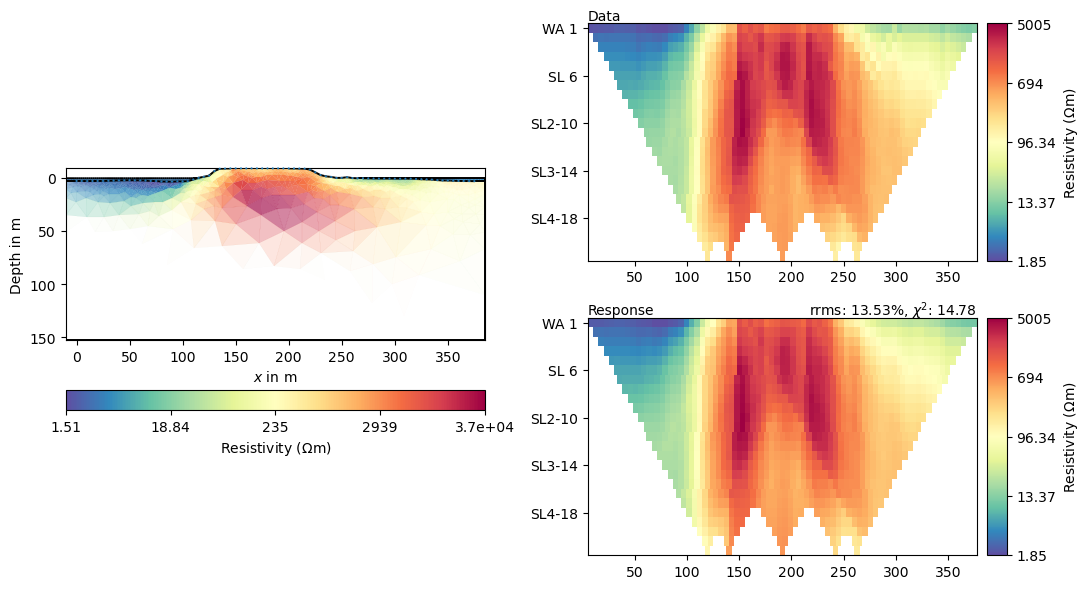

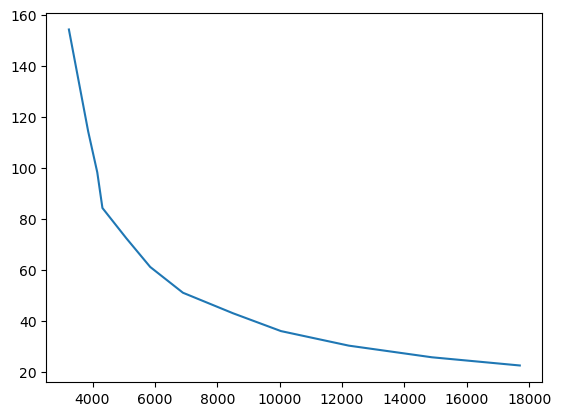

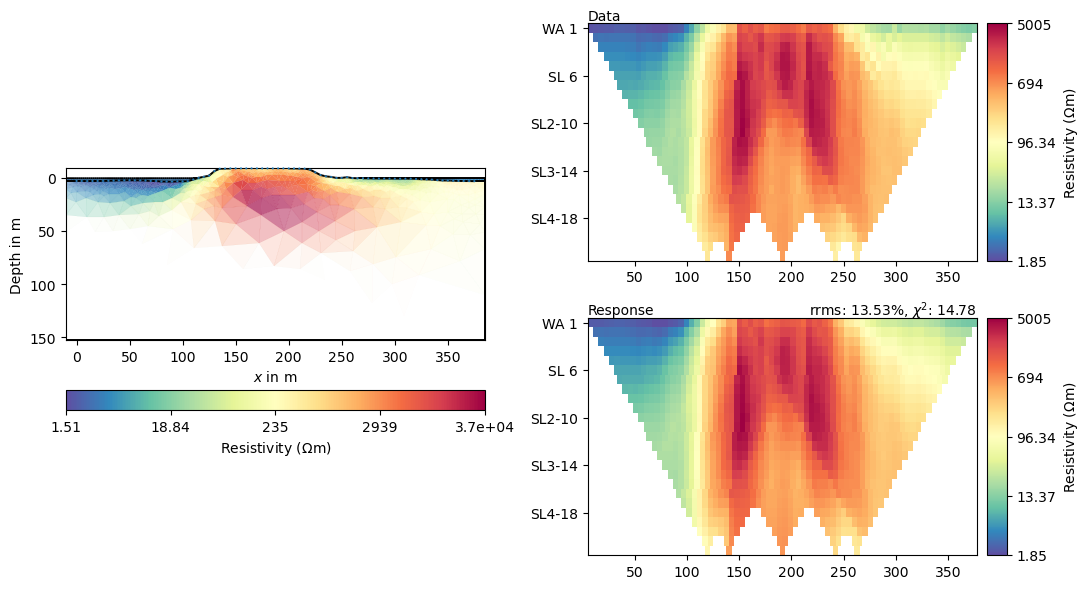

In [79]:
mgr.setMesh(mesh)


mgr.inv.setRegularization(limits=[0, 0], trans="log")
mgr.inv.setRegularization(3, single=True)
mgr.inv.setRegularization(4, single=True)
mgr.inv.setRegularization(2, zWeight=0.2)

lambdas = np.logspace(1, 3, 12)
phiD = []
phiM = []
for lam in lambdas:
    mgr.invert(data, lam=lam, verbose=True, paraDX = 0.25, paraDZ= 0.25)
    phiD.append(mgr.inv.phiData())
    phiM.append(mgr.inv.phiModel())

plt.plot(phiD, phiM)



mgr.showResultAndFit()

In [49]:
lambdas = np.logspace(1, 2, 5)  # Regularization multiplier range
zWeights = np.linspace(0.01, 1.0, 5)  # Anisotropic smoothness weight range (low to high)

phiD = []
phiM = []
rms = []
chi2 = []
results = []

mgr.inv.setRegularization(limits=[0, 0], trans="log")
mgr.inv.setRegularization(3, single=True)
mgr.inv.setRegularization(4, single=True)


for zWeight in zWeights:
    mgr.inv.setRegularization(2, zWeight=zWeight)  # Set zWeight for anisotropic smoothness
    for lam in lambdas:
        mgr.invert(data, lam=lam, verbose=True, paraDX=0.25, paraDZ=0.25)
        
        # Store metrics
        phi_d = mgr.inv.phiData()
        phi_m = mgr.inv.phiModel()
        rms_val = mgr.inv.relrms()  # Calculate relative RMS
        chi2_val = mgr.inv.chi2()  # Assuming errors are normalized

        phiD.append(phi_d)
        phiM.append(phi_m)
        rms.append(rms_val)
        chi2.append(chi2_val)

        results.append({'lambda': lam, 'zWeight': zWeight, 'phiD': phi_d, 'phiM': phi_m, 'RMS': rms_val, 'chi2': chi2_val})

05/12/24 - 09:37:36 - pyGIMLi - INFO - Use median(data values)=422.28496788679416
05/12/24 - 09:37:36 - pyGIMLi - INFO - Created startmodel from forward operator: 2411, min/max=422.284968/422.284968
05/12/24 - 09:37:36 - pyGIMLi - INFO - Starting inversion.


fop: <pygimli.physics.ert.ertModelling.ERTModelling object at 0x000002909806C9A0>
Data transformation: <pgcore._pygimli_.RTransLogLU object at 0x000002909806CB80>
Model transformation (cumulative):
	 0 <pgcore._pygimli_.RTransLogLU object at 0x00000291244809E0>
	 1 <pgcore._pygimli_.RTransLogLU object at 0x0000029124480F20>
	 2 <pgcore._pygimli_.RTransLogLU object at 0x0000029124481540>
min/max (data): 1.85/5005
min/max (error): 3%/8.9%
min/max (start model): 422/422
--------------------------------------------------------------------------------
inv.iter 0 ... chi² = 2488.58
--------------------------------------------------------------------------------
inv.iter 1 ... chi² = 1725.50 (dPhi = 30.66%) lam: 10.0
--------------------------------------------------------------------------------
inv.iter 2 ... chi² =  485.80 (dPhi = 71.82%) lam: 10.0
--------------------------------------------------------------------------------
inv.iter 3 ... chi² =  224.01 (dPhi = 53.86%) lam: 10.0
------

05/12/24 - 09:43:47 - pyGIMLi - INFO - Use median(data values)=422.28496788679416
05/12/24 - 09:43:47 - pyGIMLi - INFO - Created startmodel from forward operator: 2411, min/max=422.284968/422.284968
05/12/24 - 09:43:47 - pyGIMLi - INFO - Starting inversion.


chi² =   21.47 (dPhi = 0.77%) lam: 10.0
################################################################################
#                Abort criterion reached: dPhi = 0.77 (< 2.0%)                 #
################################################################################
fop: <pygimli.physics.ert.ertModelling.ERTModelling object at 0x000002909806C9A0>
Data transformation: <pgcore._pygimli_.RTransLogLU object at 0x000002909806CB80>
Model transformation (cumulative):
	 0 <pgcore._pygimli_.RTransLogLU object at 0x0000029124481540>
	 1 <pgcore._pygimli_.RTransLogLU object at 0x0000029124480660>
	 2 <pgcore._pygimli_.RTransLogLU object at 0x00000291244814D0>
min/max (data): 1.85/5005
min/max (error): 3%/8.9%
min/max (start model): 422/422
--------------------------------------------------------------------------------
inv.iter 0 ... chi² = 2488.58
--------------------------------------------------------------------------------
inv.iter 1 ... chi² = 1757.75 (dPhi = 29.37%) lam: 17

05/12/24 - 09:49:14 - pyGIMLi - INFO - Use median(data values)=422.28496788679416
05/12/24 - 09:49:14 - pyGIMLi - INFO - Created startmodel from forward operator: 2411, min/max=422.284968/422.284968
05/12/24 - 09:49:14 - pyGIMLi - INFO - Starting inversion.


chi² =   19.14 (dPhi = 0.92%) lam: 17.8
################################################################################
#                Abort criterion reached: dPhi = 0.92 (< 2.0%)                 #
################################################################################
fop: <pygimli.physics.ert.ertModelling.ERTModelling object at 0x000002909806C9A0>
Data transformation: <pgcore._pygimli_.RTransLogLU object at 0x000002909806CB80>
Model transformation (cumulative):
	 0 <pgcore._pygimli_.RTransLogLU object at 0x0000029124481540>
	 1 <pgcore._pygimli_.RTransLogLU object at 0x0000029124480660>
	 2 <pgcore._pygimli_.RTransLogLU object at 0x0000029124481380>
min/max (data): 1.85/5005
min/max (error): 3%/8.9%
min/max (start model): 422/422
--------------------------------------------------------------------------------
inv.iter 0 ... chi² = 2488.58
--------------------------------------------------------------------------------
inv.iter 1 ... chi² = 1715.68 (dPhi = 31.06%) lam: 31

05/12/24 - 09:54:59 - pyGIMLi - INFO - Use median(data values)=422.28496788679416
05/12/24 - 09:54:59 - pyGIMLi - INFO - Created startmodel from forward operator: 2411, min/max=422.284968/422.284968
05/12/24 - 09:54:59 - pyGIMLi - INFO - Starting inversion.


chi² =    3.99 (dPhi = 0.26%) lam: 31.6
################################################################################
#                Abort criterion reached: dPhi = 0.26 (< 2.0%)                 #
################################################################################
fop: <pygimli.physics.ert.ertModelling.ERTModelling object at 0x000002909806C9A0>
Data transformation: <pgcore._pygimli_.RTransLogLU object at 0x000002909806CB80>
Model transformation (cumulative):
	 0 <pgcore._pygimli_.RTransLogLU object at 0x0000029124481540>
	 1 <pgcore._pygimli_.RTransLogLU object at 0x0000029124480660>
	 2 <pgcore._pygimli_.RTransLogLU object at 0x0000029124480F20>
min/max (data): 1.85/5005
min/max (error): 3%/8.9%
min/max (start model): 422/422
--------------------------------------------------------------------------------
inv.iter 0 ... chi² = 2488.58
--------------------------------------------------------------------------------
inv.iter 1 ... chi² = 1563.29 (dPhi = 37.18%) lam: 56

05/12/24 - 10:01:27 - pyGIMLi - INFO - Use median(data values)=422.28496788679416
05/12/24 - 10:01:27 - pyGIMLi - INFO - Created startmodel from forward operator: 2411, min/max=422.284968/422.284968
05/12/24 - 10:01:27 - pyGIMLi - INFO - Starting inversion.


chi² =    4.97 (dPhi = -0.78%) lam: 56.2
################################################################################
#                Abort criterion reached: dPhi = -0.78 (< 2.0%)                #
################################################################################
fop: <pygimli.physics.ert.ertModelling.ERTModelling object at 0x000002909806C9A0>
Data transformation: <pgcore._pygimli_.RTransLogLU object at 0x000002909806CB80>
Model transformation (cumulative):
	 0 <pgcore._pygimli_.RTransLogLU object at 0x00000291244809E0>
	 1 <pgcore._pygimli_.RTransLogLU object at 0x0000029124481540>
	 2 <pgcore._pygimli_.RTransLogLU object at 0x0000029124480660>
min/max (data): 1.85/5005
min/max (error): 3%/8.9%
min/max (start model): 422/422
--------------------------------------------------------------------------------
inv.iter 0 ... chi² = 2488.58
--------------------------------------------------------------------------------
inv.iter 1 ... chi² = 1356.89 (dPhi = 45.47%) lam: 1

05/12/24 - 10:11:21 - pyGIMLi - INFO - Use median(data values)=422.28496788679416
05/12/24 - 10:11:21 - pyGIMLi - INFO - Created startmodel from forward operator: 2411, min/max=422.284968/422.284968
05/12/24 - 10:11:21 - pyGIMLi - INFO - Starting inversion.


chi² =    3.63 (dPhi = 0.94%) lam: 100.0
################################################################################
#                Abort criterion reached: dPhi = 0.94 (< 2.0%)                 #
################################################################################
fop: <pygimli.physics.ert.ertModelling.ERTModelling object at 0x000002909806C9A0>
Data transformation: <pgcore._pygimli_.RTransLogLU object at 0x000002909806CB80>
Model transformation (cumulative):
	 0 <pgcore._pygimli_.RTransLogLU object at 0x00000291244809E0>
	 1 <pgcore._pygimli_.RTransLogLU object at 0x0000029124481540>
	 2 <pgcore._pygimli_.RTransLogLU object at 0x00000291244814D0>
min/max (data): 1.85/5005
min/max (error): 3%/8.9%
min/max (start model): 422/422
--------------------------------------------------------------------------------
inv.iter 0 ... chi² = 2488.58
--------------------------------------------------------------------------------
inv.iter 1 ... chi² =  724.90 (dPhi = 70.84%) lam: 1

05/12/24 - 10:16:11 - pyGIMLi - INFO - Use median(data values)=422.28496788679416
05/12/24 - 10:16:11 - pyGIMLi - INFO - Created startmodel from forward operator: 2411, min/max=422.284968/422.284968
05/12/24 - 10:16:11 - pyGIMLi - INFO - Starting inversion.


chi² =    4.51 (dPhi = 0.81%) lam: 10.0
################################################################################
#                Abort criterion reached: dPhi = 0.81 (< 2.0%)                 #
################################################################################
fop: <pygimli.physics.ert.ertModelling.ERTModelling object at 0x000002909806C9A0>
Data transformation: <pgcore._pygimli_.RTransLogLU object at 0x000002909806CB80>
Model transformation (cumulative):
	 0 <pgcore._pygimli_.RTransLogLU object at 0x0000029124481540>
	 1 <pgcore._pygimli_.RTransLogLU object at 0x00000291244814D0>
	 2 <pgcore._pygimli_.RTransLogLU object at 0x0000029124480F20>
min/max (data): 1.85/5005
min/max (error): 3%/8.9%
min/max (start model): 422/422
--------------------------------------------------------------------------------
inv.iter 0 ... chi² = 2488.58
--------------------------------------------------------------------------------
inv.iter 1 ... chi² =  639.55 (dPhi = 74.25%) lam: 17

05/12/24 - 10:21:12 - pyGIMLi - INFO - Use median(data values)=422.28496788679416
05/12/24 - 10:21:12 - pyGIMLi - INFO - Created startmodel from forward operator: 2411, min/max=422.284968/422.284968
05/12/24 - 10:21:12 - pyGIMLi - INFO - Starting inversion.


chi² =    3.18 (dPhi = 0.85%) lam: 17.8
################################################################################
#                Abort criterion reached: dPhi = 0.85 (< 2.0%)                 #
################################################################################
fop: <pygimli.physics.ert.ertModelling.ERTModelling object at 0x000002909806C9A0>
Data transformation: <pgcore._pygimli_.RTransLogLU object at 0x000002909806CB80>
Model transformation (cumulative):
	 0 <pgcore._pygimli_.RTransLogLU object at 0x0000029124481540>
	 1 <pgcore._pygimli_.RTransLogLU object at 0x00000291244814D0>
	 2 <pgcore._pygimli_.RTransLogLU object at 0x0000029124480F20>
min/max (data): 1.85/5005
min/max (error): 3%/8.9%
min/max (start model): 422/422
--------------------------------------------------------------------------------
inv.iter 0 ... chi² = 2488.58
--------------------------------------------------------------------------------
inv.iter 1 ... chi² =  569.97 (dPhi = 77.03%) lam: 31

05/12/24 - 10:25:43 - pyGIMLi - INFO - Use median(data values)=422.28496788679416
05/12/24 - 10:25:43 - pyGIMLi - INFO - Created startmodel from forward operator: 2411, min/max=422.284968/422.284968
05/12/24 - 10:25:43 - pyGIMLi - INFO - Starting inversion.


chi² =    3.79 (dPhi = 1.49%) lam: 31.6
################################################################################
#                Abort criterion reached: dPhi = 1.49 (< 2.0%)                 #
################################################################################
fop: <pygimli.physics.ert.ertModelling.ERTModelling object at 0x000002909806C9A0>
Data transformation: <pgcore._pygimli_.RTransLogLU object at 0x000002909806CB80>
Model transformation (cumulative):
	 0 <pgcore._pygimli_.RTransLogLU object at 0x0000029124481540>
	 1 <pgcore._pygimli_.RTransLogLU object at 0x00000291244814D0>
	 2 <pgcore._pygimli_.RTransLogLU object at 0x0000029124480F20>
min/max (data): 1.85/5005
min/max (error): 3%/8.9%
min/max (start model): 422/422
--------------------------------------------------------------------------------
inv.iter 0 ... chi² = 2488.58
--------------------------------------------------------------------------------
inv.iter 1 ... chi² =  489.54 (dPhi = 80.24%) lam: 56

05/12/24 - 10:30:07 - pyGIMLi - INFO - Use median(data values)=422.28496788679416
05/12/24 - 10:30:07 - pyGIMLi - INFO - Created startmodel from forward operator: 2411, min/max=422.284968/422.284968
05/12/24 - 10:30:07 - pyGIMLi - INFO - Starting inversion.


chi² =    4.49 (dPhi = 2.86%) lam: 56.2
--------------------------------------------------------------------------------
inv.iter 11 ... chi² =    4.41 (dPhi = 0.79%) lam: 56.2
################################################################################
#                Abort criterion reached: dPhi = 0.79 (< 2.0%)                 #
################################################################################
fop: <pygimli.physics.ert.ertModelling.ERTModelling object at 0x000002909806C9A0>
Data transformation: <pgcore._pygimli_.RTransLogLU object at 0x000002909806CB80>
Model transformation (cumulative):
	 0 <pgcore._pygimli_.RTransLogLU object at 0x00000291244814D0>
	 1 <pgcore._pygimli_.RTransLogLU object at 0x0000029124480F20>
	 2 <pgcore._pygimli_.RTransLogLU object at 0x0000029124481000>
min/max (data): 1.85/5005
min/max (error): 3%/8.9%
min/max (start model): 422/422
--------------------------------------------------------------------------------
inv.iter 0 ... chi² = 2488.

05/12/24 - 10:32:44 - pyGIMLi - INFO - Use median(data values)=422.28496788679416
05/12/24 - 10:32:44 - pyGIMLi - INFO - Created startmodel from forward operator: 2411, min/max=422.284968/422.284968
05/12/24 - 10:32:44 - pyGIMLi - INFO - Starting inversion.


chi² =    6.76 (dPhi = 1.52%) lam: 100.0
################################################################################
#                Abort criterion reached: dPhi = 1.52 (< 2.0%)                 #
################################################################################
fop: <pygimli.physics.ert.ertModelling.ERTModelling object at 0x000002909806C9A0>
Data transformation: <pgcore._pygimli_.RTransLogLU object at 0x000002909806CB80>
Model transformation (cumulative):
	 0 <pgcore._pygimli_.RTransLogLU object at 0x00000291244809E0>
	 1 <pgcore._pygimli_.RTransLogLU object at 0x0000029124481540>
	 2 <pgcore._pygimli_.RTransLogLU object at 0x00000291244814D0>
min/max (data): 1.85/5005
min/max (error): 3%/8.9%
min/max (start model): 422/422
--------------------------------------------------------------------------------
inv.iter 0 ... chi² = 2488.58
--------------------------------------------------------------------------------
inv.iter 1 ... chi² =  606.47 (dPhi = 75.57%) lam: 1

05/12/24 - 10:37:46 - pyGIMLi - INFO - Use median(data values)=422.28496788679416
05/12/24 - 10:37:46 - pyGIMLi - INFO - Created startmodel from forward operator: 2411, min/max=422.284968/422.284968
05/12/24 - 10:37:46 - pyGIMLi - INFO - Starting inversion.


chi² =    3.68 (dPhi = 1.98%) lam: 10.0
################################################################################
#                Abort criterion reached: dPhi = 1.98 (< 2.0%)                 #
################################################################################
fop: <pygimli.physics.ert.ertModelling.ERTModelling object at 0x000002909806C9A0>
Data transformation: <pgcore._pygimli_.RTransLogLU object at 0x000002909806CB80>
Model transformation (cumulative):
	 0 <pgcore._pygimli_.RTransLogLU object at 0x0000029124481540>
	 1 <pgcore._pygimli_.RTransLogLU object at 0x00000291244814D0>
	 2 <pgcore._pygimli_.RTransLogLU object at 0x0000029124480660>
min/max (data): 1.85/5005
min/max (error): 3%/8.9%
min/max (start model): 422/422
--------------------------------------------------------------------------------
inv.iter 0 ... chi² = 2488.58
--------------------------------------------------------------------------------
inv.iter 1 ... chi² =  537.82 (dPhi = 78.31%) lam: 17

05/12/24 - 10:42:51 - pyGIMLi - INFO - Use median(data values)=422.28496788679416
05/12/24 - 10:42:51 - pyGIMLi - INFO - Created startmodel from forward operator: 2411, min/max=422.284968/422.284968
05/12/24 - 10:42:51 - pyGIMLi - INFO - Starting inversion.


chi² =    3.89 (dPhi = 0.71%) lam: 17.8
################################################################################
#                Abort criterion reached: dPhi = 0.71 (< 2.0%)                 #
################################################################################
fop: <pygimli.physics.ert.ertModelling.ERTModelling object at 0x000002909806C9A0>
Data transformation: <pgcore._pygimli_.RTransLogLU object at 0x000002909806CB80>
Model transformation (cumulative):
	 0 <pgcore._pygimli_.RTransLogLU object at 0x00000291244809E0>
	 1 <pgcore._pygimli_.RTransLogLU object at 0x0000029124481540>
	 2 <pgcore._pygimli_.RTransLogLU object at 0x00000291244814D0>
min/max (data): 1.85/5005
min/max (error): 3%/8.9%
min/max (start model): 422/422
--------------------------------------------------------------------------------
inv.iter 0 ... chi² = 2488.58
--------------------------------------------------------------------------------
inv.iter 1 ... chi² =  469.90 (dPhi = 81.02%) lam: 31

05/12/24 - 10:47:21 - pyGIMLi - INFO - Use median(data values)=422.28496788679416
05/12/24 - 10:47:21 - pyGIMLi - INFO - Created startmodel from forward operator: 2411, min/max=422.284968/422.284968
05/12/24 - 10:47:21 - pyGIMLi - INFO - Starting inversion.


chi² =    4.75 (dPhi = 1.52%) lam: 31.6
################################################################################
#                Abort criterion reached: dPhi = 1.52 (< 2.0%)                 #
################################################################################
fop: <pygimli.physics.ert.ertModelling.ERTModelling object at 0x000002909806C9A0>
Data transformation: <pgcore._pygimli_.RTransLogLU object at 0x000002909806CB80>
Model transformation (cumulative):
	 0 <pgcore._pygimli_.RTransLogLU object at 0x00000291244809E0>
	 1 <pgcore._pygimli_.RTransLogLU object at 0x0000029124481540>
	 2 <pgcore._pygimli_.RTransLogLU object at 0x0000029124481000>
min/max (data): 1.85/5005
min/max (error): 3%/8.9%
min/max (start model): 422/422
--------------------------------------------------------------------------------
inv.iter 0 ... chi² = 2488.58
--------------------------------------------------------------------------------
inv.iter 1 ... chi² =  415.66 (dPhi = 83.17%) lam: 56

05/12/24 - 10:50:13 - pyGIMLi - INFO - Use median(data values)=422.28496788679416
05/12/24 - 10:50:13 - pyGIMLi - INFO - Created startmodel from forward operator: 2411, min/max=422.284968/422.284968
05/12/24 - 10:50:13 - pyGIMLi - INFO - Starting inversion.


chi² =    6.15 (dPhi = 0.63%) lam: 56.2
################################################################################
#                Abort criterion reached: dPhi = 0.63 (< 2.0%)                 #
################################################################################
fop: <pygimli.physics.ert.ertModelling.ERTModelling object at 0x000002909806C9A0>
Data transformation: <pgcore._pygimli_.RTransLogLU object at 0x000002909806CB80>
Model transformation (cumulative):
	 0 <pgcore._pygimli_.RTransLogLU object at 0x00000291244809E0>
	 1 <pgcore._pygimli_.RTransLogLU object at 0x0000029124481540>
	 2 <pgcore._pygimli_.RTransLogLU object at 0x0000029124480F20>
min/max (data): 1.85/5005
min/max (error): 3%/8.9%
min/max (start model): 422/422
--------------------------------------------------------------------------------
inv.iter 0 ... chi² = 2488.58
--------------------------------------------------------------------------------
inv.iter 1 ... chi² =  372.74 (dPhi = 84.86%) lam: 10

05/12/24 - 10:53:03 - pyGIMLi - INFO - Use median(data values)=422.28496788679416
05/12/24 - 10:53:03 - pyGIMLi - INFO - Created startmodel from forward operator: 2411, min/max=422.284968/422.284968
05/12/24 - 10:53:03 - pyGIMLi - INFO - Starting inversion.


chi² =    8.27 (dPhi = 0.48%) lam: 100.0
################################################################################
#                Abort criterion reached: dPhi = 0.48 (< 2.0%)                 #
################################################################################
fop: <pygimli.physics.ert.ertModelling.ERTModelling object at 0x000002909806C9A0>
Data transformation: <pgcore._pygimli_.RTransLogLU object at 0x000002909806CB80>
Model transformation (cumulative):
	 0 <pgcore._pygimli_.RTransLogLU object at 0x0000029124480E40>
	 1 <pgcore._pygimli_.RTransLogLU object at 0x00000291244809E0>
	 2 <pgcore._pygimli_.RTransLogLU object at 0x0000029124481540>
min/max (data): 1.85/5005
min/max (error): 3%/8.9%
min/max (start model): 422/422
--------------------------------------------------------------------------------
inv.iter 0 ... chi² = 2488.58
--------------------------------------------------------------------------------
inv.iter 1 ... chi² =  559.37 (dPhi = 77.45%) lam: 1

05/12/24 - 10:57:41 - pyGIMLi - INFO - Use median(data values)=422.28496788679416
05/12/24 - 10:57:41 - pyGIMLi - INFO - Created startmodel from forward operator: 2411, min/max=422.284968/422.284968
05/12/24 - 10:57:41 - pyGIMLi - INFO - Starting inversion.


chi² =    3.78 (dPhi = 1.65%) lam: 10.0
################################################################################
#                Abort criterion reached: dPhi = 1.65 (< 2.0%)                 #
################################################################################
fop: <pygimli.physics.ert.ertModelling.ERTModelling object at 0x000002909806C9A0>
Data transformation: <pgcore._pygimli_.RTransLogLU object at 0x000002909806CB80>
Model transformation (cumulative):
	 0 <pgcore._pygimli_.RTransLogLU object at 0x00000291244809E0>
	 1 <pgcore._pygimli_.RTransLogLU object at 0x0000029124481540>
	 2 <pgcore._pygimli_.RTransLogLU object at 0x0000029124481380>
min/max (data): 1.85/5005
min/max (error): 3%/8.9%
min/max (start model): 422/422
--------------------------------------------------------------------------------
inv.iter 0 ... chi² = 2488.58
--------------------------------------------------------------------------------
inv.iter 1 ... chi² =  487.28 (dPhi = 80.32%) lam: 17

05/12/24 - 11:02:51 - pyGIMLi - INFO - Use median(data values)=422.28496788679416
05/12/24 - 11:02:51 - pyGIMLi - INFO - Created startmodel from forward operator: 2411, min/max=422.284968/422.284968
05/12/24 - 11:02:51 - pyGIMLi - INFO - Starting inversion.


chi² =    4.41 (dPhi = 0.32%) lam: 17.8
################################################################################
#                Abort criterion reached: dPhi = 0.32 (< 2.0%)                 #
################################################################################
fop: <pygimli.physics.ert.ertModelling.ERTModelling object at 0x000002909806C9A0>
Data transformation: <pgcore._pygimli_.RTransLogLU object at 0x000002909806CB80>
Model transformation (cumulative):
	 0 <pgcore._pygimli_.RTransLogLU object at 0x00000291244809E0>
	 1 <pgcore._pygimli_.RTransLogLU object at 0x0000029124481540>
	 2 <pgcore._pygimli_.RTransLogLU object at 0x0000029124481380>
min/max (data): 1.85/5005
min/max (error): 3%/8.9%
min/max (start model): 422/422
--------------------------------------------------------------------------------
inv.iter 0 ... chi² = 2488.58
--------------------------------------------------------------------------------
inv.iter 1 ... chi² =  429.54 (dPhi = 82.61%) lam: 31

05/12/24 - 11:05:27 - pyGIMLi - INFO - Use median(data values)=422.28496788679416
05/12/24 - 11:05:27 - pyGIMLi - INFO - Created startmodel from forward operator: 2411, min/max=422.284968/422.284968
05/12/24 - 11:05:27 - pyGIMLi - INFO - Starting inversion.


chi² =    6.78 (dPhi = 1.02%) lam: 31.6
################################################################################
#                Abort criterion reached: dPhi = 1.02 (< 2.0%)                 #
################################################################################
fop: <pygimli.physics.ert.ertModelling.ERTModelling object at 0x000002909806C9A0>
Data transformation: <pgcore._pygimli_.RTransLogLU object at 0x000002909806CB80>
Model transformation (cumulative):
	 0 <pgcore._pygimli_.RTransLogLU object at 0x00000291244809E0>
	 1 <pgcore._pygimli_.RTransLogLU object at 0x0000029124481540>
	 2 <pgcore._pygimli_.RTransLogLU object at 0x00000291244813F0>
min/max (data): 1.85/5005
min/max (error): 3%/8.9%
min/max (start model): 422/422
--------------------------------------------------------------------------------
inv.iter 0 ... chi² = 2488.58
--------------------------------------------------------------------------------
inv.iter 1 ... chi² =  383.17 (dPhi = 84.44%) lam: 56

05/12/24 - 11:09:26 - pyGIMLi - INFO - Use median(data values)=422.28496788679416
05/12/24 - 11:09:26 - pyGIMLi - INFO - Created startmodel from forward operator: 2411, min/max=422.284968/422.284968
05/12/24 - 11:09:26 - pyGIMLi - INFO - Starting inversion.


chi² =    8.03 (dPhi = 0.27%) lam: 56.2
################################################################################
#                Abort criterion reached: dPhi = 0.27 (< 2.0%)                 #
################################################################################
fop: <pygimli.physics.ert.ertModelling.ERTModelling object at 0x000002909806C9A0>
Data transformation: <pgcore._pygimli_.RTransLogLU object at 0x000002909806CB80>
Model transformation (cumulative):
	 0 <pgcore._pygimli_.RTransLogLU object at 0x00000291244809E0>
	 1 <pgcore._pygimli_.RTransLogLU object at 0x0000029124481540>
	 2 <pgcore._pygimli_.RTransLogLU object at 0x0000029124481000>
min/max (data): 1.85/5005
min/max (error): 3%/8.9%
min/max (start model): 422/422
--------------------------------------------------------------------------------
inv.iter 0 ... chi² = 2488.58
--------------------------------------------------------------------------------
inv.iter 1 ... chi² =  346.02 (dPhi = 85.88%) lam: 10

05/12/24 - 11:12:09 - pyGIMLi - INFO - Use median(data values)=422.28496788679416
05/12/24 - 11:12:09 - pyGIMLi - INFO - Created startmodel from forward operator: 2411, min/max=422.284968/422.284968
05/12/24 - 11:12:09 - pyGIMLi - INFO - Starting inversion.


chi² =   10.81 (dPhi = 1.73%) lam: 100.0
################################################################################
#                Abort criterion reached: dPhi = 1.73 (< 2.0%)                 #
################################################################################
fop: <pygimli.physics.ert.ertModelling.ERTModelling object at 0x000002909806C9A0>
Data transformation: <pgcore._pygimli_.RTransLogLU object at 0x000002909806CB80>
Model transformation (cumulative):
	 0 <pgcore._pygimli_.RTransLogLU object at 0x0000029124480E40>
	 1 <pgcore._pygimli_.RTransLogLU object at 0x00000291244809E0>
	 2 <pgcore._pygimli_.RTransLogLU object at 0x0000029124481540>
min/max (data): 1.85/5005
min/max (error): 3%/8.9%
min/max (start model): 422/422
--------------------------------------------------------------------------------
inv.iter 0 ... chi² = 2488.58
--------------------------------------------------------------------------------
inv.iter 1 ... chi² =  517.66 (dPhi = 79.11%) lam: 1

05/12/24 - 11:17:07 - pyGIMLi - INFO - Use median(data values)=422.28496788679416
05/12/24 - 11:17:07 - pyGIMLi - INFO - Created startmodel from forward operator: 2411, min/max=422.284968/422.284968
05/12/24 - 11:17:07 - pyGIMLi - INFO - Starting inversion.


chi² =    4.06 (dPhi = 0.45%) lam: 10.0
################################################################################
#                Abort criterion reached: dPhi = 0.45 (< 2.0%)                 #
################################################################################
fop: <pygimli.physics.ert.ertModelling.ERTModelling object at 0x000002909806C9A0>
Data transformation: <pgcore._pygimli_.RTransLogLU object at 0x000002909806CB80>
Model transformation (cumulative):
	 0 <pgcore._pygimli_.RTransLogLU object at 0x00000291244809E0>
	 1 <pgcore._pygimli_.RTransLogLU object at 0x0000029124481380>
	 2 <pgcore._pygimli_.RTransLogLU object at 0x0000029124481000>
min/max (data): 1.85/5005
min/max (error): 3%/8.9%
min/max (start model): 422/422
--------------------------------------------------------------------------------
inv.iter 0 ... chi² = 2488.58
--------------------------------------------------------------------------------
inv.iter 1 ... chi² =  461.87 (dPhi = 81.33%) lam: 17

05/12/24 - 11:20:54 - pyGIMLi - INFO - Use median(data values)=422.28496788679416
05/12/24 - 11:20:54 - pyGIMLi - INFO - Created startmodel from forward operator: 2411, min/max=422.284968/422.284968
05/12/24 - 11:20:54 - pyGIMLi - INFO - Starting inversion.


chi² =    5.38 (dPhi = 1.25%) lam: 17.8
################################################################################
#                Abort criterion reached: dPhi = 1.25 (< 2.0%)                 #
################################################################################
fop: <pygimli.physics.ert.ertModelling.ERTModelling object at 0x000002909806C9A0>
Data transformation: <pgcore._pygimli_.RTransLogLU object at 0x000002909806CB80>
Model transformation (cumulative):
	 0 <pgcore._pygimli_.RTransLogLU object at 0x00000291244809E0>
	 1 <pgcore._pygimli_.RTransLogLU object at 0x0000029124481380>
	 2 <pgcore._pygimli_.RTransLogLU object at 0x0000029124481000>
min/max (data): 1.85/5005
min/max (error): 3%/8.9%
min/max (start model): 422/422
--------------------------------------------------------------------------------
inv.iter 0 ... chi² = 2488.58
--------------------------------------------------------------------------------
inv.iter 1 ... chi² =  409.03 (dPhi = 83.42%) lam: 31

05/12/24 - 11:23:59 - pyGIMLi - INFO - Use median(data values)=422.28496788679416
05/12/24 - 11:23:59 - pyGIMLi - INFO - Created startmodel from forward operator: 2411, min/max=422.284968/422.284968
05/12/24 - 11:23:59 - pyGIMLi - INFO - Starting inversion.


chi² =    7.12 (dPhi = 0.60%) lam: 31.6
################################################################################
#                 Abort criterion reached: dPhi = 0.6 (< 2.0%)                 #
################################################################################
fop: <pygimli.physics.ert.ertModelling.ERTModelling object at 0x000002909806C9A0>
Data transformation: <pgcore._pygimli_.RTransLogLU object at 0x000002909806CB80>
Model transformation (cumulative):
	 0 <pgcore._pygimli_.RTransLogLU object at 0x00000291244809E0>
	 1 <pgcore._pygimli_.RTransLogLU object at 0x0000029124481380>
	 2 <pgcore._pygimli_.RTransLogLU object at 0x00000291244813F0>
min/max (data): 1.85/5005
min/max (error): 3%/8.9%
min/max (start model): 422/422
--------------------------------------------------------------------------------
inv.iter 0 ... chi² = 2488.58
--------------------------------------------------------------------------------
inv.iter 1 ... chi² =  366.29 (dPhi = 85.09%) lam: 56

05/12/24 - 11:27:09 - pyGIMLi - INFO - Use median(data values)=422.28496788679416
05/12/24 - 11:27:09 - pyGIMLi - INFO - Created startmodel from forward operator: 2411, min/max=422.284968/422.284968
05/12/24 - 11:27:09 - pyGIMLi - INFO - Starting inversion.


chi² =    9.92 (dPhi = 2.58%) lam: 56.2
--------------------------------------------------------------------------------
inv.iter 8 ... chi² =    9.38 (dPhi = 1.25%) lam: 56.2
################################################################################
#                Abort criterion reached: dPhi = 1.25 (< 2.0%)                 #
################################################################################
fop: <pygimli.physics.ert.ertModelling.ERTModelling object at 0x000002909806C9A0>
Data transformation: <pgcore._pygimli_.RTransLogLU object at 0x000002909806CB80>
Model transformation (cumulative):
	 0 <pgcore._pygimli_.RTransLogLU object at 0x0000029124481380>
	 1 <pgcore._pygimli_.RTransLogLU object at 0x00000291244813F0>
	 2 <pgcore._pygimli_.RTransLogLU object at 0x0000029124481540>
min/max (data): 1.85/5005
min/max (error): 3%/8.9%
min/max (start model): 422/422
--------------------------------------------------------------------------------
inv.iter 0 ... chi² = 2488.5

In [54]:
import numpy as np

# Define the number of desired points
desired_points = 5

# Extract phiD, phiM, etc. from the results based on your selection
phiD_grid = np.zeros((desired_points, desired_points))
phiM_grid = np.zeros((desired_points, desired_points))

# For example, select the first 5 values of zWeights and lambdas
selected_zWeights = np.linspace(0.01, 1.0, desired_points)  # Or use your original zWeights
selected_lambdas = np.logspace(1, 2, desired_points)  # Or use your original lambdas

# Find the indices of the desired zWeights and lambdas
for i, zWeight in enumerate(selected_zWeights):
    for j, lam in enumerate(selected_lambdas):
        # Extract the result for the current combination of zWeight and lambda
        # Assuming 'results' is the list of dictionaries with the collected data
        for result in results:
            if result['zWeight'] == zWeight and result['lambda'] == lam:
                # Store the data in the grid
                phiD_grid[i, j] = result['phiD']
                phiM_grid[i, j] = result['phiM']

# Now you have phiD_grid and phiM_grid as 5x5 matrices


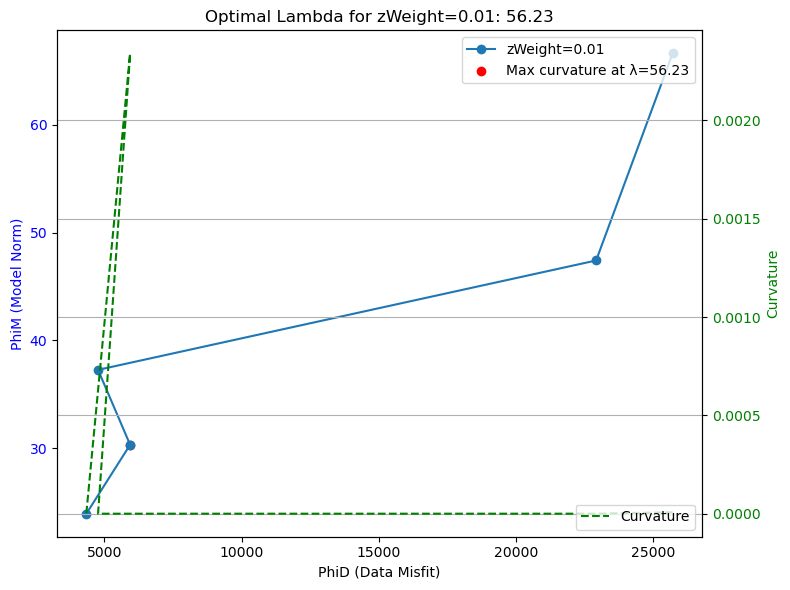

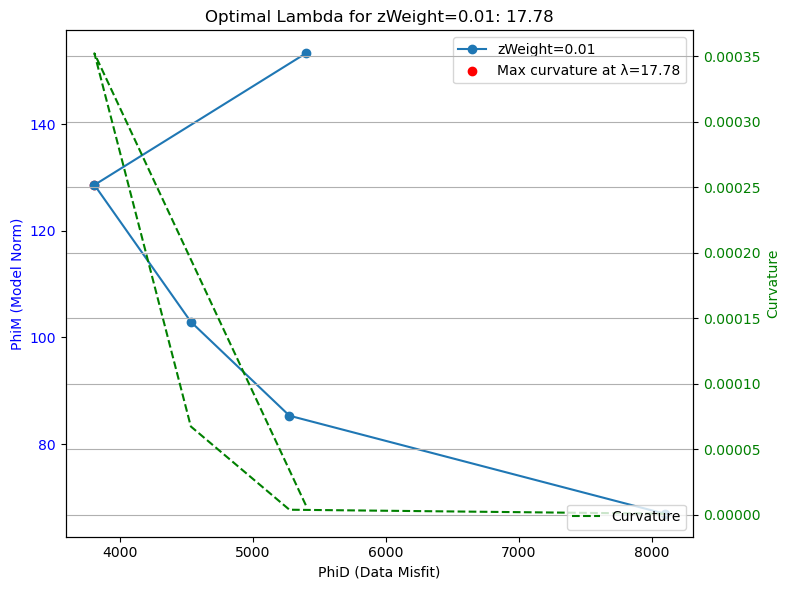

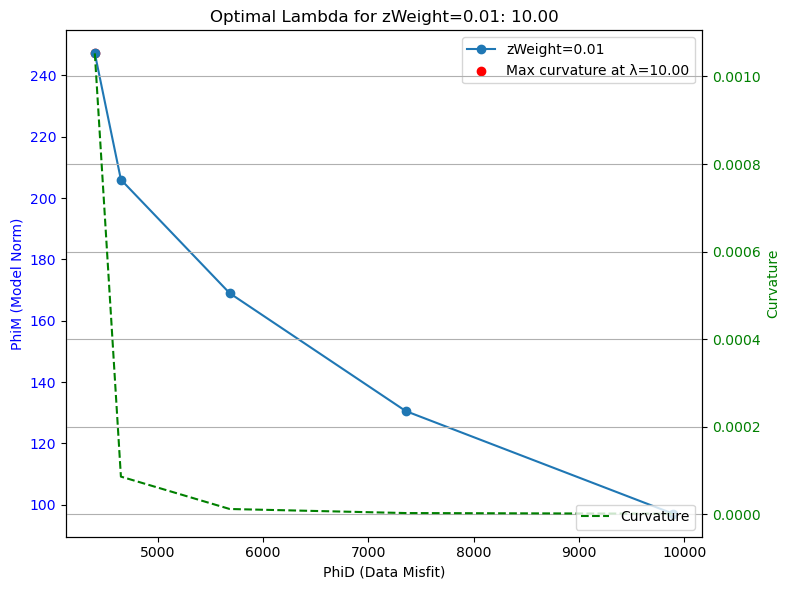

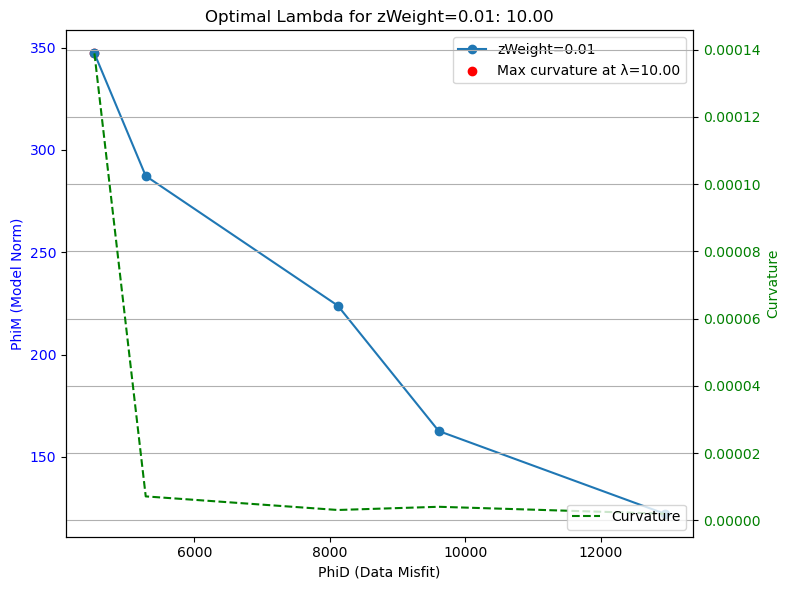

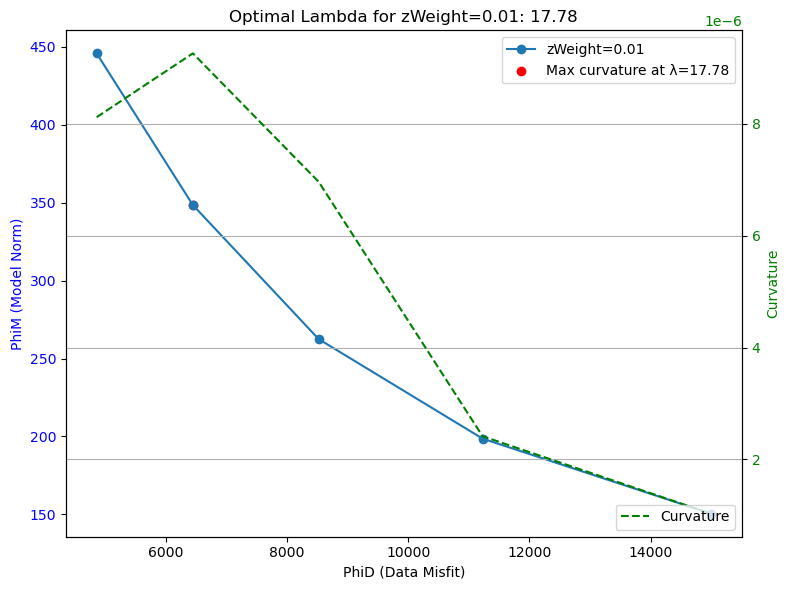

IndexError: index 5 is out of bounds for axis 0 with size 5

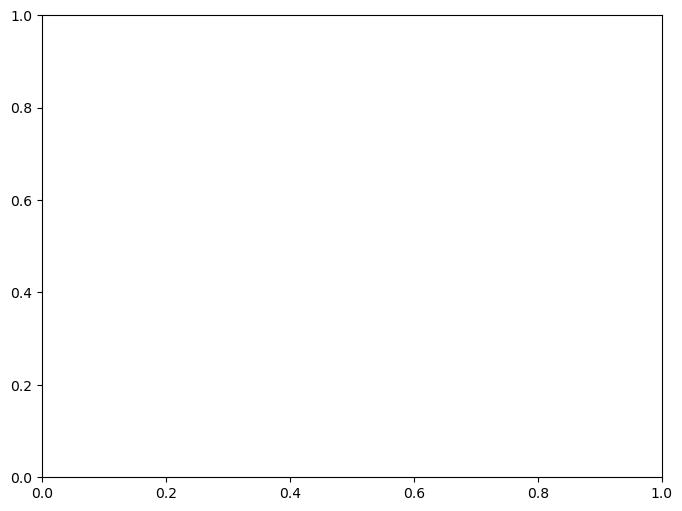

In [56]:
dx = lambdas[1] - lambdas[0]  # Assuming uniform spacing between lambdas

dphiD = np.gradient(phiD_grid, dx, axis=1)
dphiM = np.gradient(phiM_grid, dx, axis=1)
ddphiD = np.gradient(dphiD, dx, axis=1)
ddphiM = np.gradient(dphiM, dx, axis=1)

# Step 4: Calculate the curvature
curvature = np.abs(dphiD * ddphiM - dphiM * ddphiD) / (dphiD**2 + dphiM**2)**1.5

# Step 5: Plot the results for each zWeight
for i, zWeight in enumerate(zWeights):
    # Create a figure and axis for each plot
    fig, ax1 = plt.subplots(figsize=(8, 6))

    # Plot Phi curve (phiD vs. phiM)
    ax1.plot(phiD_grid[i], phiM_grid[i], '-o', label=f'zWeight={zWeight:.2f}')
    ax1.set_xlabel('PhiD (Data Misfit)')
    ax1.set_ylabel('PhiM (Model Norm)', color='blue')
    ax1.tick_params(axis='y', labelcolor='blue')

    # Plot the point of maximum curvature
    max_curvature_index = np.argmax(curvature[i])  # Find the index of maximum curvature for this zWeight
    optimal_lambda = lambdas[max_curvature_index]
    ax1.scatter(phiD_grid[i, max_curvature_index], phiM_grid[i, max_curvature_index], color='red',
                label=f'Max curvature at λ={optimal_lambda:.2f}')
    
    # Add legend and title
    ax1.legend(loc='upper right')
    ax1.set_title(f'Optimal Lambda for zWeight={zWeight:.2f}: {optimal_lambda:.2f}')
    
    # Add curvature plot on secondary axis (using twinx)
    ax2 = ax1.twinx()
    ax2.plot(phiD_grid[i], curvature[i], '--', label='Curvature', color='green')
    ax2.set_ylabel('Curvature', color='green')
    ax2.tick_params(axis='y', labelcolor='green')
    ax2.legend(loc='lower right')

    # Display grid and layout
    plt.grid()
    plt.tight_layout()
    plt.show()

In [82]:
with open(dir+'processing/shoreline/joined_east.pkl', 'rb') as f:
    joined_east = pickle.load(f)

In [83]:
eastshore = joined_east[['year', 'xc', 'zc']].to_numpy()
eastshore[:, 1] = eastshore[:, 1].round(decimals=0)
eastshore[:, 2] = eastshore[:, 2].round(decimals=1)


In [84]:
posVec2 = [pg.Pos(pos) for pos in zip(eastshore[:, 1], eastshore[:, 2])]
para = pg.Mesh(mgr.paraDomain)
para.setCellMarkers(pg.IVector(para.cellCount()))

parasat = pg.Mesh(ERTPetro30.paraDomain)
parasat.setCellMarkers(pg.IVector(para.cellCount()))

fopDP = PriorModelling(para, posVec2)
fopDPsat = PriorModelling(parasat, posVec2)

resMesh = fopDP(mgr.model)

sat30 = fopDPsat(ERTPetro30.paraModel(satERT30))
sat40 = fopDPsat(ERTPetro40.paraModel(satERT40))
sat50 = fopDPsat(ERTPetro50.paraModel(satERT50))

cov = fopDP(mgr.coverage())

east_shoreline_plots = np.column_stack((eastshore[:, 1], eastshore[:, 2], resMesh, eastshore[:, 0], cov, sat30, sat40, sat50))
east_shoreline_plots = np.c_[ east_shoreline_plots, 2023 - east_shoreline_plots[:, 3] ]
column_titles = "X,Y,ResMesh,Year,Cov,Sat30,Sat40,Sat50,Age"
np.savetxt(
    dir+'processing/shoreline/east_shoreline_plots.csv', 
    east_shoreline_plots, 
    delimiter=',', 
    header=column_titles, 
    comments=''  # Removes the '#' added to the header line by default
)

06/01/25 - 09:01:06 - pyGIMLi - INFO - Found 1 regions.
06/01/25 - 09:01:06 - pyGIMLi - INFO - Found 1 regions.
